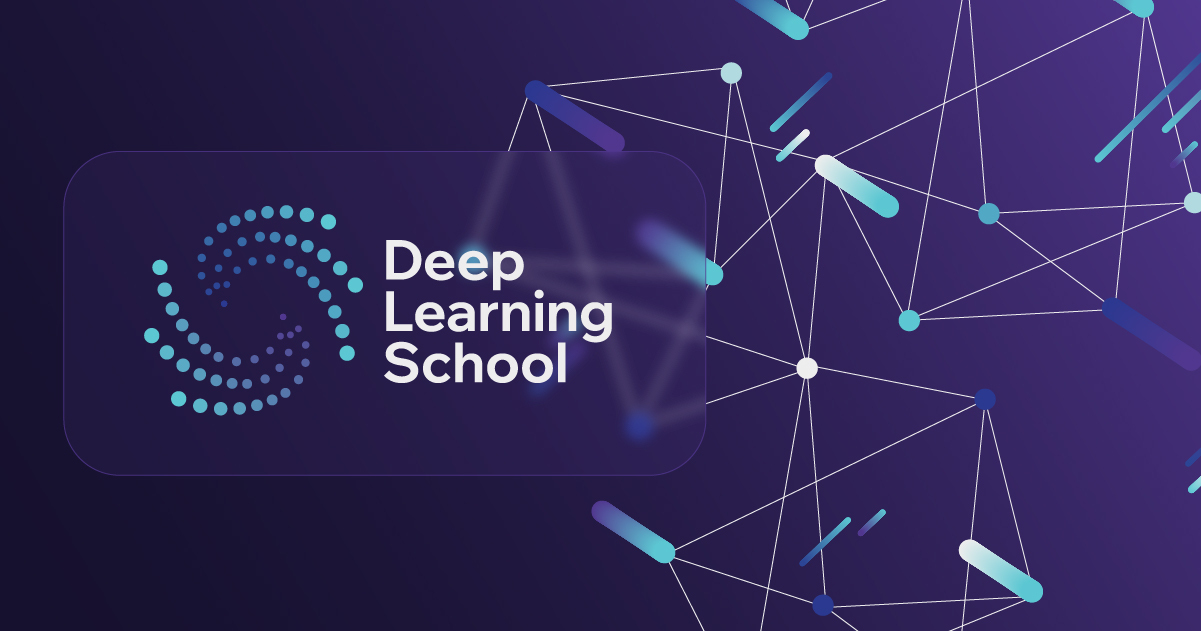

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h1 style="text-align: center;"><b>Домашнее задание. Библиотека sklearn и классификация с помощью KNN</b></h1>

## Описание домашнего задания

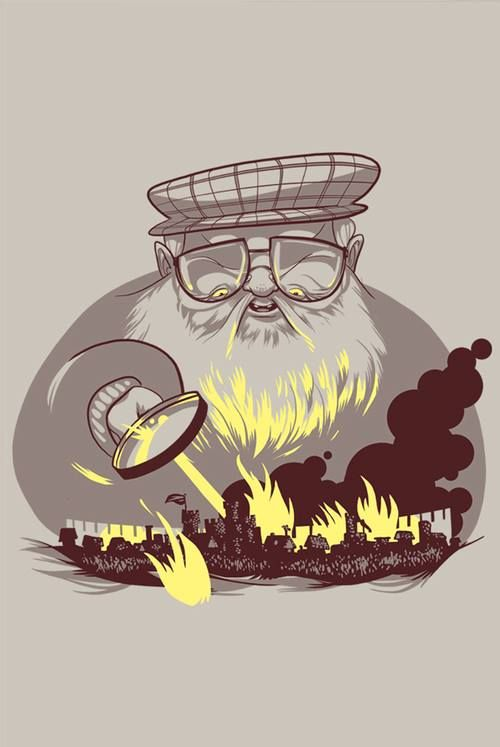

В данном задании вы будете работать с датасетом о персонажах из вселенной Игры Престолов [A Wiki of Ice and Fire](http://awoiaf.westeros.org/). Вам предстоит предсказать, кто из персонажей умрет, а кто останется вживых.



Описание данных:

* **name**: Имя персонажа

* **Title**: Социальный статус или знатность

* **House**: Дом, к которому принадлежит персонаж

* **Culture**: Социальная группа, к которой принадлежит персонаж

* **book1/2/3/4/5**: Появление персонажа в книге

* **Is noble**: Знатность персонажа, основанное на титуле

* **Age**: Отсчет времени: 305 AC

* **male**: Мужчина или женщина

* **dateOfBirth**: дата рождения

* **Spouse**: Имя супруги\а персонажа

* **Father**: Имя отца персонажа

* **Mother**: Имя матери персонажа

* **Heir**: Имя наследника персонажа

* **Is married**: Represents whether the character is married

* **Is spouse alive**: Represents whether character's spouse is alive

* **Is mother alive:** Жива ли мать персонажа

* **Is heir alive:** Жив ли наследник персонажа

* **Is father alive:** Указывает, жив ли отец персонажа

* **Number dead relations:** Количество умерших персонажей, с которыми персонаж связан

* **Popularity score:** Количество внутренних входящих и исходящих ссылок на страницу персонажей в вики http://awoiaf.westeros.org

Целевая переменная:
* **isAlive**: жив ли персонаж в книге

Оценивание:

Баллы считаются следующим образом:

1) $1.00 \geqslant score \geqslant 0.75$ --- 5 баллов

2) $0.75 > score \geqslant 0.65$ --- 4 балла

3) $0.65 > score \geqslant 0.55$ --- 3 балла

4) $0.55 > score \geqslant 0.50$ --- 2 балла

5) $0.50 > score \geqslant 0.45$ --- 1 балл

6) $0.45 > score$ --- 0 баллов

## Часть 1. Анализ и предобработка данных

Здесь вам необходимо сделать все шаги, которые обсуждались в первой части семинара.
* Предобработка данных
  * Обработка пропущенных данных
  * Создание новых признаков
  * Удаление ненужных столбцов
* Анализ данных
  * Анализ целевой переменной
  * Анализ признаков
  * Анализ влияния признаков на целевую переменную
* Подготовка данных для обучения модели

Загружаем датасет

**Задание 1.1.** Импортируйте библиотеки pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Задание 1.2.** Загрузите датасет в Pandas DataFrame при помощи функции `read_csv`. Вместо дефолтных наименований строк `0,1,...`, при помощи параметра `index_col`, сделайте значения колонки `S.No` наименованиями строк:

In [2]:
data = pd.read_csv('game_of_thrones_train.csv', index_col='S.No')
# data.set_index('S.No')
data

,name,title,male,culture,dateOfBirth,mother,father,heir,house,spouse,...,isAliveMother,isAliveFather,isAliveHeir,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,Rhaenyra Targaryen,Daemon Targaryen,Aegon IV Targaryen,NaN,NaN,...,1.0,0.0,0.0,NaN,0,0,NaN,11,0.605351,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,NaN,NaN,NaN,House Frey,Perra Royce,...,NaN,NaN,NaN,1.0,1,1,97.0,1,0.896321,1
3,Addison Hill,Ser,1,NaN,NaN,NaN,NaN,NaN,House Swyft,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.267559,1
4,Aemma Arryn,Queen,0,NaN,82.0,NaN,NaN,NaN,House Arryn,Viserys I Targaryen,...,NaN,NaN,NaN,0.0,1,1,23.0,0,0.183946,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,NaN,NaN,NaN,House Santagar,Eldon Estermont,...,NaN,NaN,NaN,1.0,1,1,29.0,0,0.043478,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,1,NaN,0,0.160535,1
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.040134,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,NaN,NaN,NaN,House Seaworth,NaN,...,NaN,NaN,NaN,NaN,0,0,NaN,0,0.076923,0


**Задание 1.3.** Предобработка (очистка) данных.

Проанализируйте, если в колонках NaN значения. Если есть, примите решение, как вы их будете обрабатывать. Вы можете либо удалить их, либо заполнить каким нибудь значением (например, медианой или модой).

In [3]:
data.isAlive.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

C:\Users\swang\AppData\Local\Temp\ipykernel_3512\40026154.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='isAlive', palette='viridis')


<Axes: xlabel='isAlive', ylabel='count'>

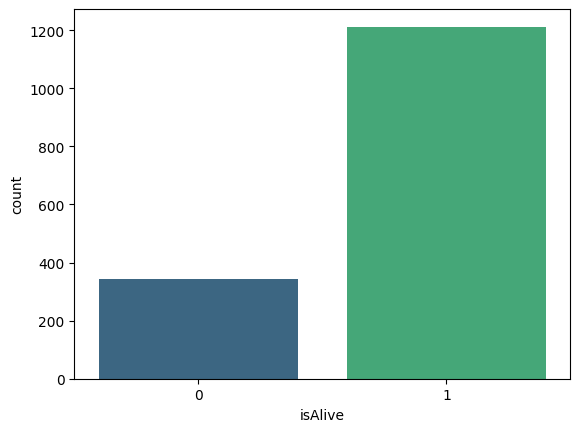

In [4]:
sns.countplot(data=data, x='isAlive', palette='viridis')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1557 non-null   object 
 1   title             717 non-null    object 
 2   male              1557 non-null   int64  
 3   culture           488 non-null    object 
 4   dateOfBirth       279 non-null    float64
 5   mother            18 non-null     object 
 6   father            22 non-null     object 
 7   heir              21 non-null     object 
 8   house             1176 non-null   object 
 9   spouse            200 non-null    object 
 10  book1             1557 non-null   int64  
 11  book2             1557 non-null   int64  
 12  book3             1557 non-null   int64  
 13  book4             1557 non-null   int64  
 14  book5             1557 non-null   int64  
 15  isAliveMother     18 non-null     float64
 16  isAliveFather     22 non-null     float64
 17  

In [15]:
(data.isna().sum() * 100 / data.shape[0])

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
mother              98.843931
father              98.587026
heir                98.651252
house               24.470135
spouse              87.154785
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveMother       98.843931
isAliveFather       98.587026
isAliveHeir         98.651252
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [26]:
te = (data.isna().sum() * 100 / data.shape[0]).to_dict()

In [35]:
te

{'name': 0.0,
 'title': 53.94990366088632,
 'male': 0.0,
 'culture': 68.65767501605652,
 'dateOfBirth': 82.08092485549133,
 'mother': 98.84393063583815,
 'father': 98.58702633269107,
 'heir': 98.65125240847784,
 'house': 24.470134874759154,
 'spouse': 87.15478484264611,
 'book1': 0.0,
 'book2': 0.0,
 'book3': 0.0,
 'book4': 0.0,
 'book5': 0.0,
 'isAliveMother': 98.84393063583815,
 'isAliveFather': 98.58702633269107,
 'isAliveHeir': 98.65125240847784,
 'isAliveSpouse': 87.15478484264611,
 'isMarried': 0.0,
 'isNoble': 0.0,
 'age': 82.08092485549133,
 'numDeadRelations': 0.0,
 'popularity': 0.0,
 'isAlive': 0.0}

In [36]:
col98 = [col for col in (data.isna().sum() * 100 / data.shape[0]).to_dict() if te[col] > 98]
col98

['mother', 'father', 'heir', 'isAliveMother', 'isAliveFather', 'isAliveHeir']

In [42]:
data = data.drop(columns=col98)

In [45]:
data = data.drop('spouse', axis=1)

In [47]:
data.isna().sum() * 100 / data.shape[0]

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
house               24.470135
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isAliveSpouse       87.154785
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [51]:
data = data.drop('isAliveSpouse', axis=1)

In [52]:
data.isna().sum() * 100 / data.shape[0]

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
house               24.470135
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
dtype: float64

In [53]:
pd.Series(data[~data.title.isna()]['title'].unique()).str.split().str[0].value_counts().head(20)

Lord             33
King              5
Prince            4
Master            4
Lady              4
Red               2
Knight            2
Captain           2
Three             2
First             2
red               1
Ser               1
Queen             1
Archmaester       1
Maester           1
Greenstone        1
Hand              1
Princess          1
PrincessSepta     1
PrincessQueen     1
Name: count, dtype: int64

In [54]:
titles = pd.Series(data[~data.title.isna()]['title'].unique()).str.split().str[0].value_counts().head(20).index[:5]

In [55]:
titles

Index(['Lord', 'King', 'Prince', 'Master', 'Lady'], dtype='object')

In [56]:
# data['r_titles'] 
def make_title(data_str):
    if type(data_str) == float: return 'no_title'
    for word in data_str.split():
        if word in titles: return word
    return 'no_title'


In [57]:
data.title.apply(make_title).value_counts()

title
no_title    1444
Lord          63
King          16
Prince        14
Lady          13
Master         7
Name: count, dtype: int64

In [60]:
data.title.apply(make_title)

S.No
1       no_title
2           Lord
3       no_title
4       no_title
5       no_title
          ...   
1553    no_title
1554    no_title
1555    no_title
1556    no_title
1557    no_title
Name: title, Length: 1557, dtype: object

In [61]:
# Помечаю тех у кого есть титул, и сразу же перекодирую
data['r_titles'] = data.title.apply(make_title).apply(lambda x: 0 if x =='no_title' else 1)

In [75]:
data.title = data.title.apply(make_title)

In [62]:
data = data.rename(columns={'r_titles': 'have_high_title'})

In [24]:
data = data.drop(columns=data.columns[(data.isna().sum() * 100 / data.shape[0]) > 98])

In [76]:
data.isna().sum()

name                   0
title                  0
male                   0
culture                0
dateOfBirth         1278
house                  0
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
have_high_title        0
dtype: int64

In [68]:
data.isna().sum() * 100 / data.shape[0]

name                 0.000000
title               53.949904
male                 0.000000
culture             68.657675
dateOfBirth         82.080925
house               24.470135
book1                0.000000
book2                0.000000
book3                0.000000
book4                0.000000
book5                0.000000
isMarried            0.000000
isNoble              0.000000
age                 82.080925
numDeadRelations     0.000000
popularity           0.000000
isAlive              0.000000
have_high_title      0.000000
dtype: float64

In [69]:
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,NaN,NaN,NaN,0,0,0,0,0,0,0,NaN,11,0.605351,0,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,NaN,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1,0
4,Aemma Arryn,Queen,0,NaN,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,NaN,NaN,NaN,1,0,1,1,0,0,1,NaN,0,0.160535,1,0
1554,Masha Heddle,NaN,0,NaN,NaN,NaN,1,1,0,0,0,0,0,NaN,0,0.040134,0,0
1555,Matthos Seaworth,NaN,1,NaN,NaN,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.076923,0,0


In [70]:
data[['culture', 'house']] = data[['culture', 'house']].fillna('unknown')

In [29]:
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,book4,book5,isAliveSpouse,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title
S.No,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,unknown,NaN,unknown,NaN,0,0,0,0,0,NaN,0,0,NaN,11,0.605351,0,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,1,1,1.0,1,1,97.0,1,0.896321,1,1
3,Addison Hill,Ser,1,unknown,NaN,House Swyft,NaN,0,0,0,1,0,NaN,0,1,NaN,0,0.267559,1,0
4,Aemma Arryn,Queen,0,unknown,82.0,House Arryn,Viserys I Targaryen,0,0,0,0,0,0.0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,1,0,1.0,1,1,29.0,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,unknown,NaN,unknown,NaN,1,0,1,1,0,NaN,0,1,NaN,0,0.160535,1,0
1554,Masha Heddle,NaN,0,unknown,NaN,unknown,NaN,1,1,0,0,0,NaN,0,0,NaN,0,0.040134,0,0
1555,Matthos Seaworth,NaN,1,unknown,NaN,House Seaworth,NaN,0,1,1,1,1,NaN,0,0,NaN,0,0.076923,0,0


In [71]:
data.isna().sum()

name                   0
title                840
male                   0
culture                0
dateOfBirth         1278
house                  0
book1                  0
book2                  0
book3                  0
book4                  0
book5                  0
isMarried              0
isNoble                0
age                 1278
numDeadRelations       0
popularity             0
isAlive                0
have_high_title        0
dtype: int64

In [72]:
data.culture

S.No
1          unknown
2         Rivermen
3          unknown
4          unknown
5          Dornish
           ...    
1553       unknown
1554       unknown
1555       unknown
1556    Crannogmen
1557       unknown
Name: culture, Length: 1557, dtype: object

In [77]:
(data.dateOfBirth.isna() == data.age.isna()).value_counts()    # Это говорит, нам о том, что у одних и тех же персонажей есть дата рождения и возраст

True    1557
Name: count, dtype: int64

In [78]:
data

,name,title,male,culture,dateOfBirth,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,NaN,unknown,0,0,0,0,0,0,0,NaN,11,0.605351,0,0
2,Walder Frey,Lord,1,Rivermen,208.0,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1
3,Addison Hill,no_title,1,unknown,NaN,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1,0
4,Aemma Arryn,no_title,0,unknown,82.0,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,no_title,0,Dornish,276.0,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,NaN,unknown,1,0,1,1,0,0,1,NaN,0,0.160535,1,0
1554,Masha Heddle,no_title,0,unknown,NaN,unknown,1,1,0,0,0,0,0,NaN,0,0.040134,0,0
1555,Matthos Seaworth,no_title,1,unknown,NaN,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.076923,0,0


In [ ]:
# Сохранил промежуточные данные для работы для того, если понадобиться изменить данные возраста

# data.to_csv('csv_for_ML/pre_prepared_data_age_and_DoB_are_NaN.csv')

<Axes: >

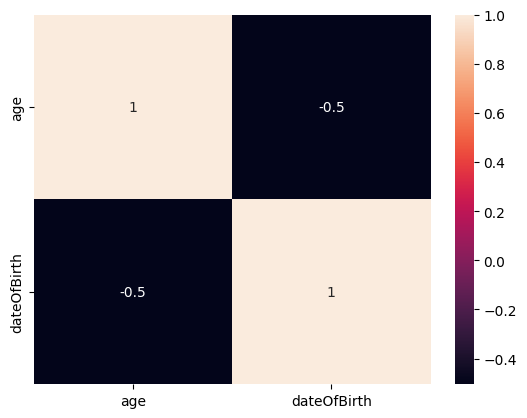

In [87]:
sns.heatmap(data[['age', 'dateOfBirth']].corr(), annot=True)

In [90]:
data = data.drop('dateOfBirth', axis=1)

In [93]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title
S.No,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,NaN,11,0.605351,0,0
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,NaN,0,0.267559,1,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,NaN,0,0.160535,1,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,NaN,0,0.040134,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,NaN,0,0.076923,0,0


<Axes: ylabel='Frequency'>

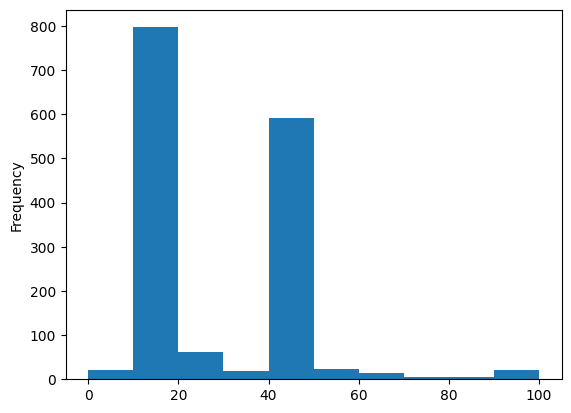

In [ ]:
data.groupby('isNoble')['age'].transform(lambda x: x.fillna(x.median())).plot(kind='hist')

<Axes: ylabel='Frequency'>

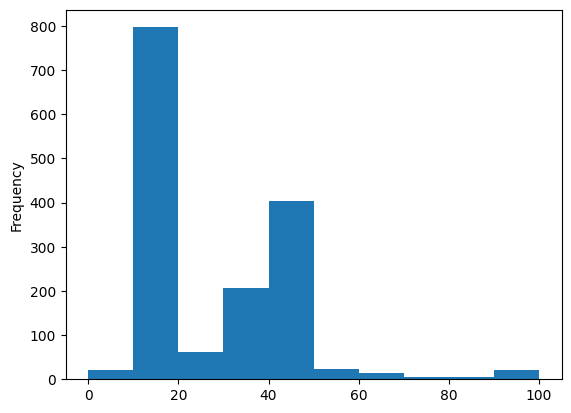

In [126]:
data.groupby(['isNoble', 'male'])['age'].transform(lambda x: x.fillna(x.median())).plot(kind='hist')

<Axes: ylabel='Frequency'>

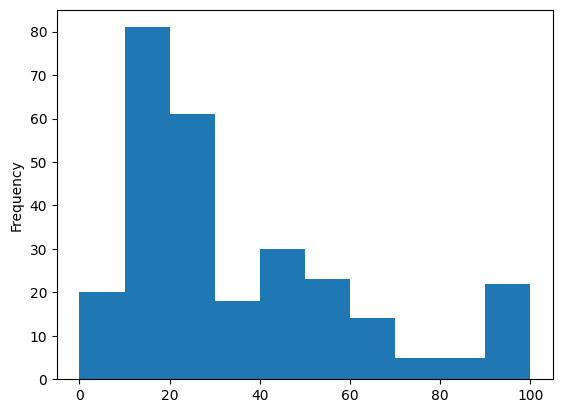

In [109]:
data.age.plot(kind='hist')

In [116]:
data['have_age'] = data.age.fillna(0).apply(lambda x: 0 if x == 0 else 1)

In [139]:
data.groupby(['isNoble', 'male'])['age'].transform(lambda x: x.fillna(x.median()))

S.No
1       19.0
2       97.0
3       42.0
4       23.0
5       29.0
        ... 
1553    42.0
1554    19.0
1555    19.0
1556    22.0
1557    12.0
Name: age, Length: 1557, dtype: float64

In [140]:
data.age

S.No
1        NaN
2       97.0
3        NaN
4       23.0
5       29.0
        ... 
1553     NaN
1554     NaN
1555     NaN
1556    22.0
1557    12.0
Name: age, Length: 1557, dtype: float64

In [141]:
data.age = data.groupby(['isNoble', 'male'])['age'].transform(lambda x: x.fillna(x.median()))

In [142]:
data.isna().sum()

name                0
title               0
male                0
culture             0
house               0
book1               0
book2               0
book3               0
book4               0
book5               0
isMarried           0
isNoble             0
age                 0
numDeadRelations    0
popularity          0
isAlive             0
have_high_title     0
have_age            0
dtype: int64

In [143]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title,have_age
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,11,0.605351,0,0,0
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,0,0.267559,1,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,1
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,0,0.160535,1,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0.040134,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0.076923,0,0,0


<Axes: ylabel='Frequency'>

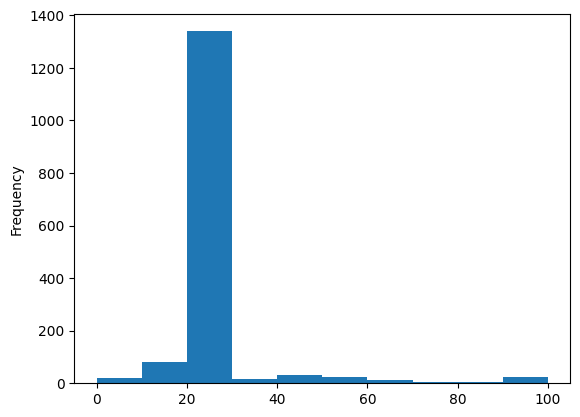

In [ ]:
# Общая медиана дает высокий пик, это плохо
data.age.fillna(data.age.median()).plot(kind='hist')

**Задание 1.4.** Создайте новые признаки.
* Создайте признак isPopular. У вас есть в таблице признак popularity score, поставьте какой то порог, например, 0.5, и пусть те персонажи, у которых popularity score меньше 0.5, непопулярны, т.е. isPopular = 0. Если же выше 0.5, тогда пусть isPopular=1.
* Создайте признак boolDeadRelations. Давайте упростим признак numDeadRelations, и просто поделим людей на тех, у кого были хоть какие то отношения с мертвыми персонажами, т.е. numDeadRelations > 0, и те, у которых не было, т.е. numDeadRelations = 0.
* Упростите признак culture, объединив схожие названия в один.


In [144]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title,have_age
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,11,0.605351,0,0,0
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,0,0.267559,1,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,1
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,0,0.160535,1,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0.040134,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0.076923,0,0,0


In [145]:
data['isPopular'] = data['popularity'].apply(lambda x: 1 if x > .5 else 0)

In [146]:
data['boolDeadRelations'] = data.numDeadRelations.apply(lambda x: 1 if x > 0 else 0)

In [147]:
# Подсказка
cult = {
    'Summer Islands': ['summer islands', 'summer islander', 'summer isles'],
    'Ghiscari': ['ghiscari', 'ghiscaricari',  'ghis'],
    'Asshai': ["asshai'i", 'asshai'],
    'Lysene': ['lysene', 'lyseni'],
    'Andal': ['andal', 'andals'],
    'Braavosi': ['braavosi', 'braavos'],
    'Dornish': ['dornishmen', 'dorne', 'dornish'],
    'Myrish': ['myr', 'myrish', 'myrmen'],
    'Westermen': ['westermen', 'westerman', 'westerlands'],
    'Westerosi': ['westeros', 'westerosi'],
    'Stormlander': ['stormlands', 'stormlander'],
    'Norvoshi': ['norvos', 'norvoshi'],
    'Northmen': ['the north', 'northmen'],
    'Free Folk': ['wildling', 'first men', 'free folk'],
    'Qartheen': ['qartheen', 'qarth'],
    'Reach': ['the reach', 'reach', 'reachmen'],
}

In [148]:
def simplify_culture(istr):
    for el in cult:
        if istr in cult[el]: return el
        else: return istr

In [149]:
data.culture = data.culture.apply(simplify_culture)

In [150]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,11,0.605351,0,0,0,1,1
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,0.896321,1,1,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,0,0.267559,1,0,0,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0.183946,0,0,1,0,0
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,0,0.043478,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,0,0.160535,1,0,0,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0.040134,0,0,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0.076923,0,0,0,0,0


In [151]:
data.to_csv('csv_for_ML/data_without_Nan.csv')

**Задание 1.5.** Проанализируйте, какие столбцы являются существенными и влияют на предсказание, а какие нет. Удалите ненужные столбцы по вашему мнению.

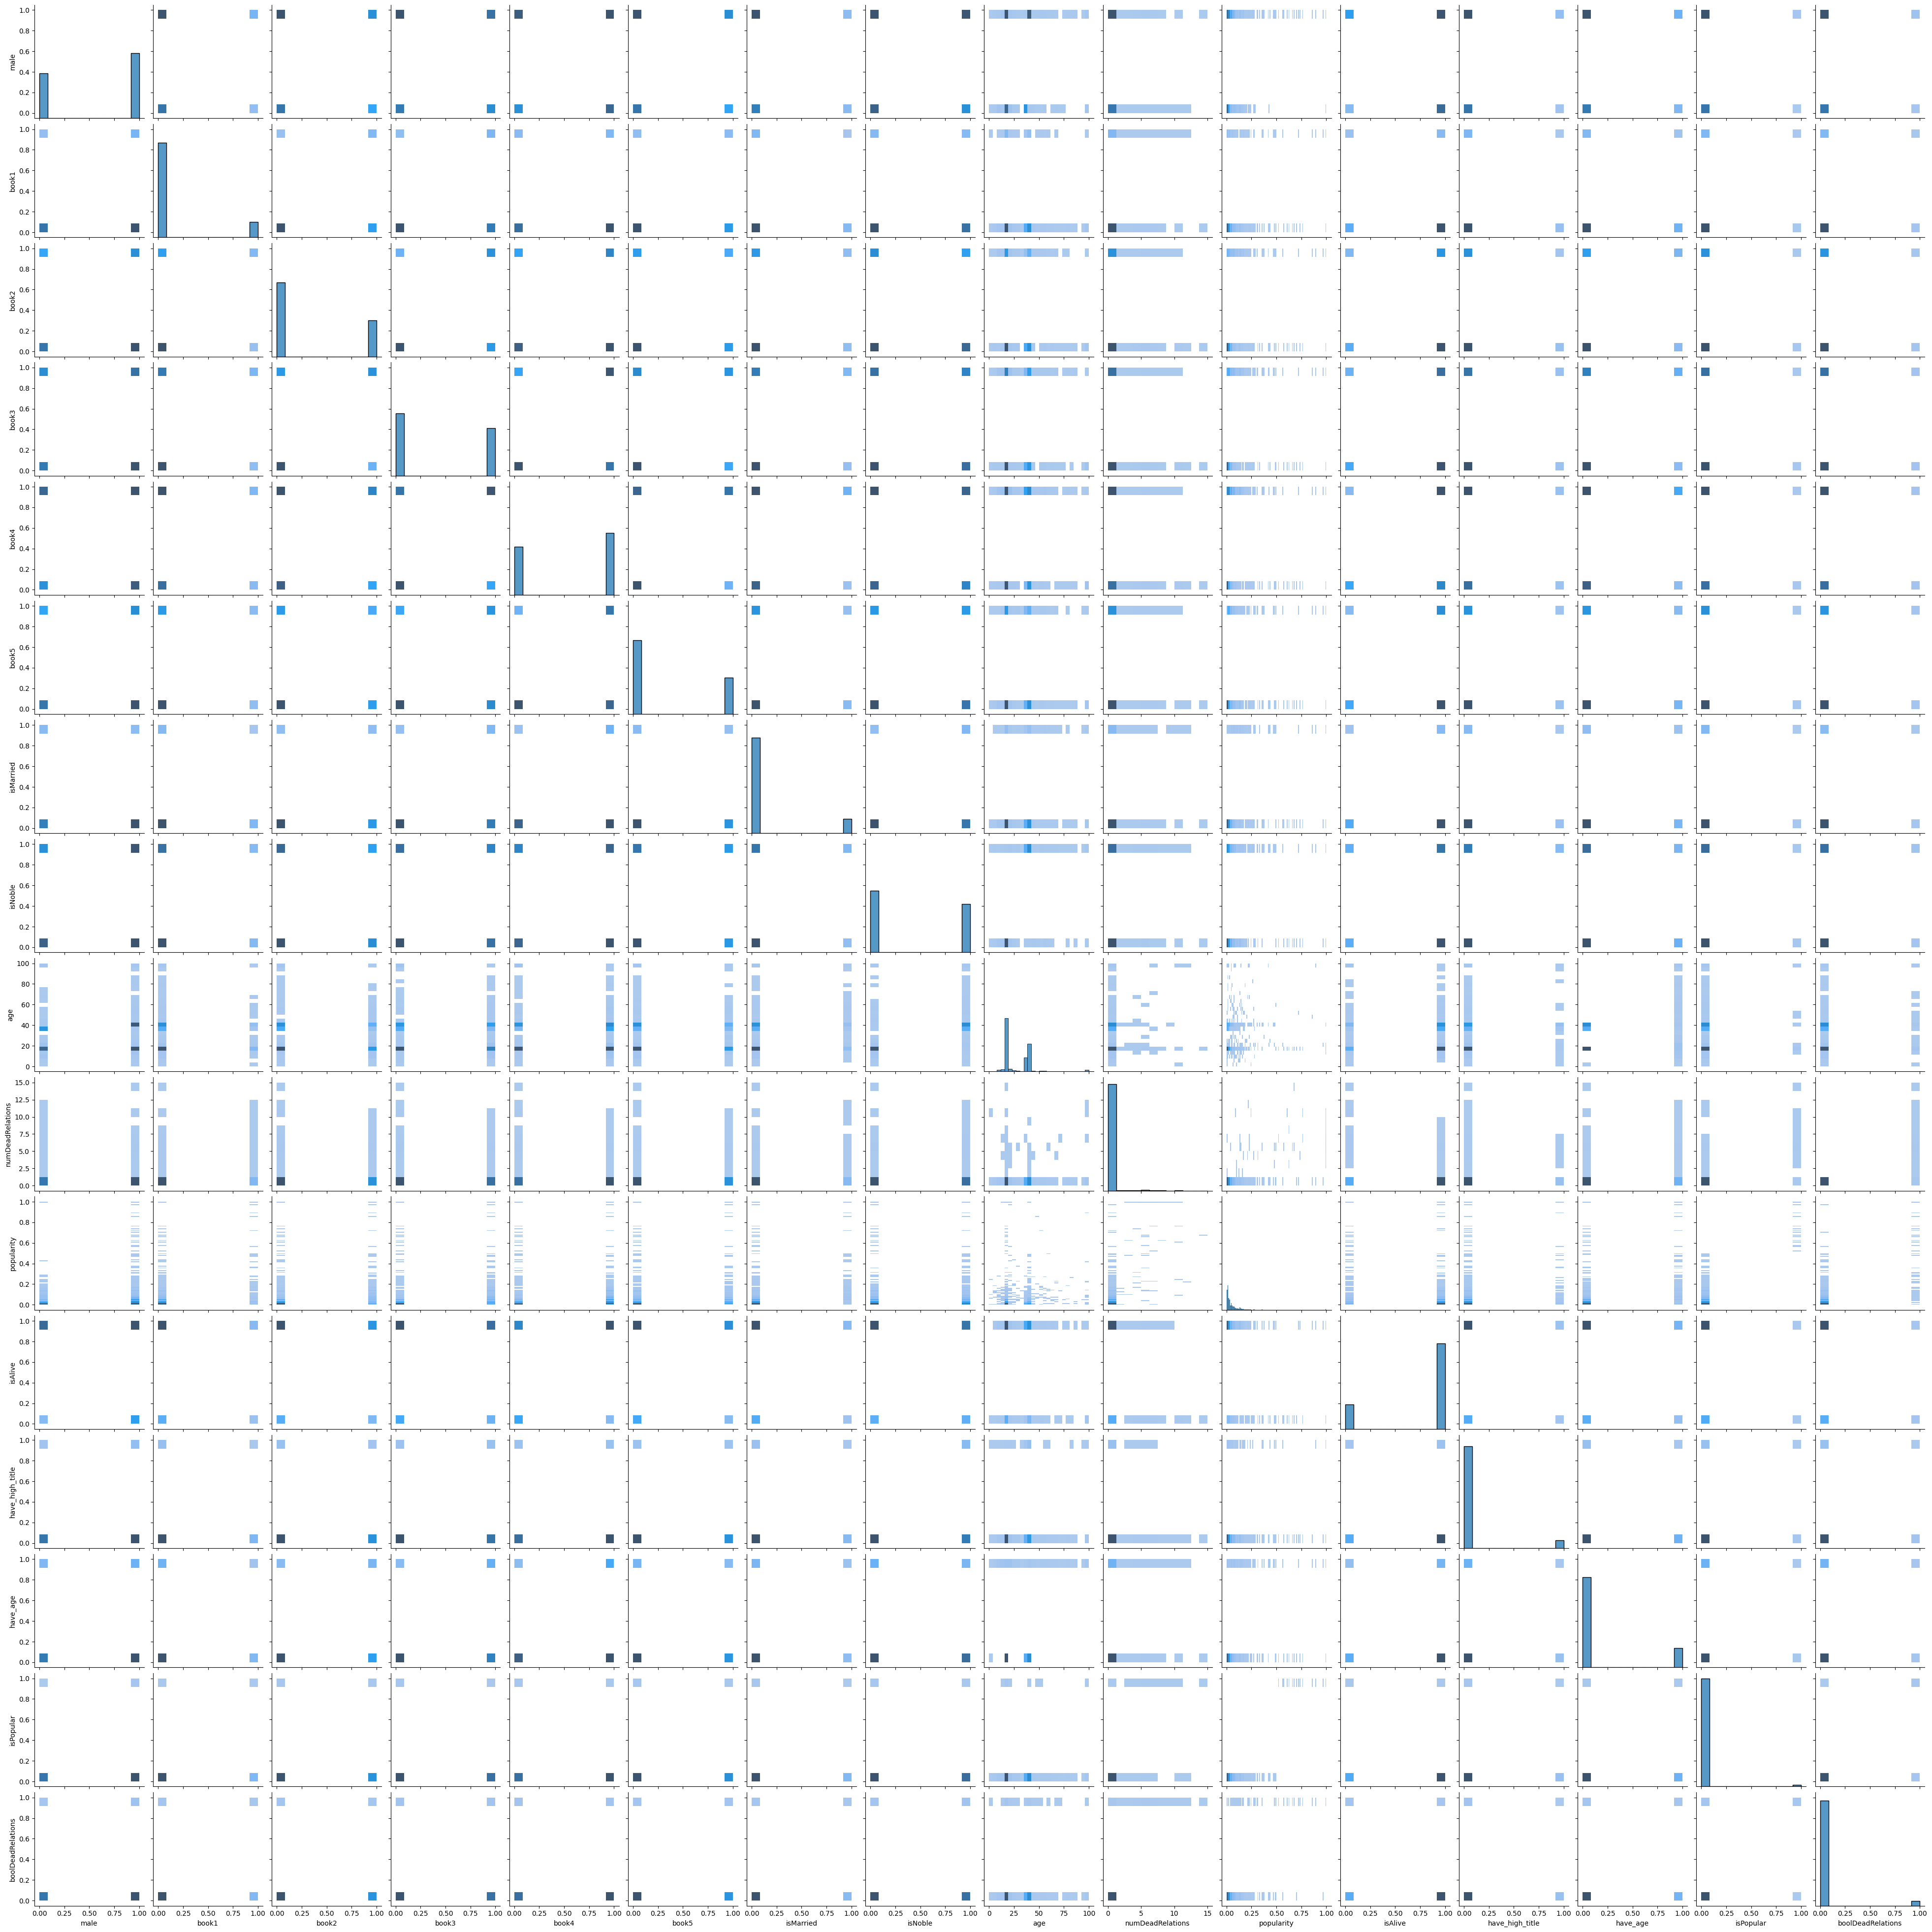

In [161]:
sns.pairplot(data=data, kind='hist')

<Axes: >

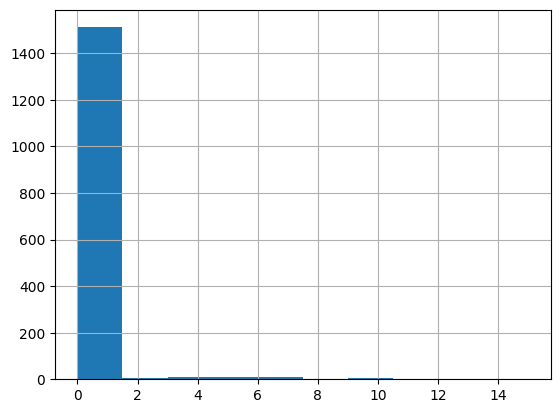

In [162]:
data.numDeadRelations.hist()

In [163]:
data.numDeadRelations.value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
12       1
11       1
15       1
9        1
Name: count, dtype: int64

In [166]:
data.columns

Index(['name', 'title', 'male', 'culture', 'house', 'book1', 'book2', 'book3',
       'book4', 'book5', 'isMarried', 'isNoble', 'age', 'numDeadRelations',
       'popularity', 'isAlive', 'have_high_title', 'have_age', 'isPopular',
       'boolDeadRelations'],
      dtype='object')

<Axes: >

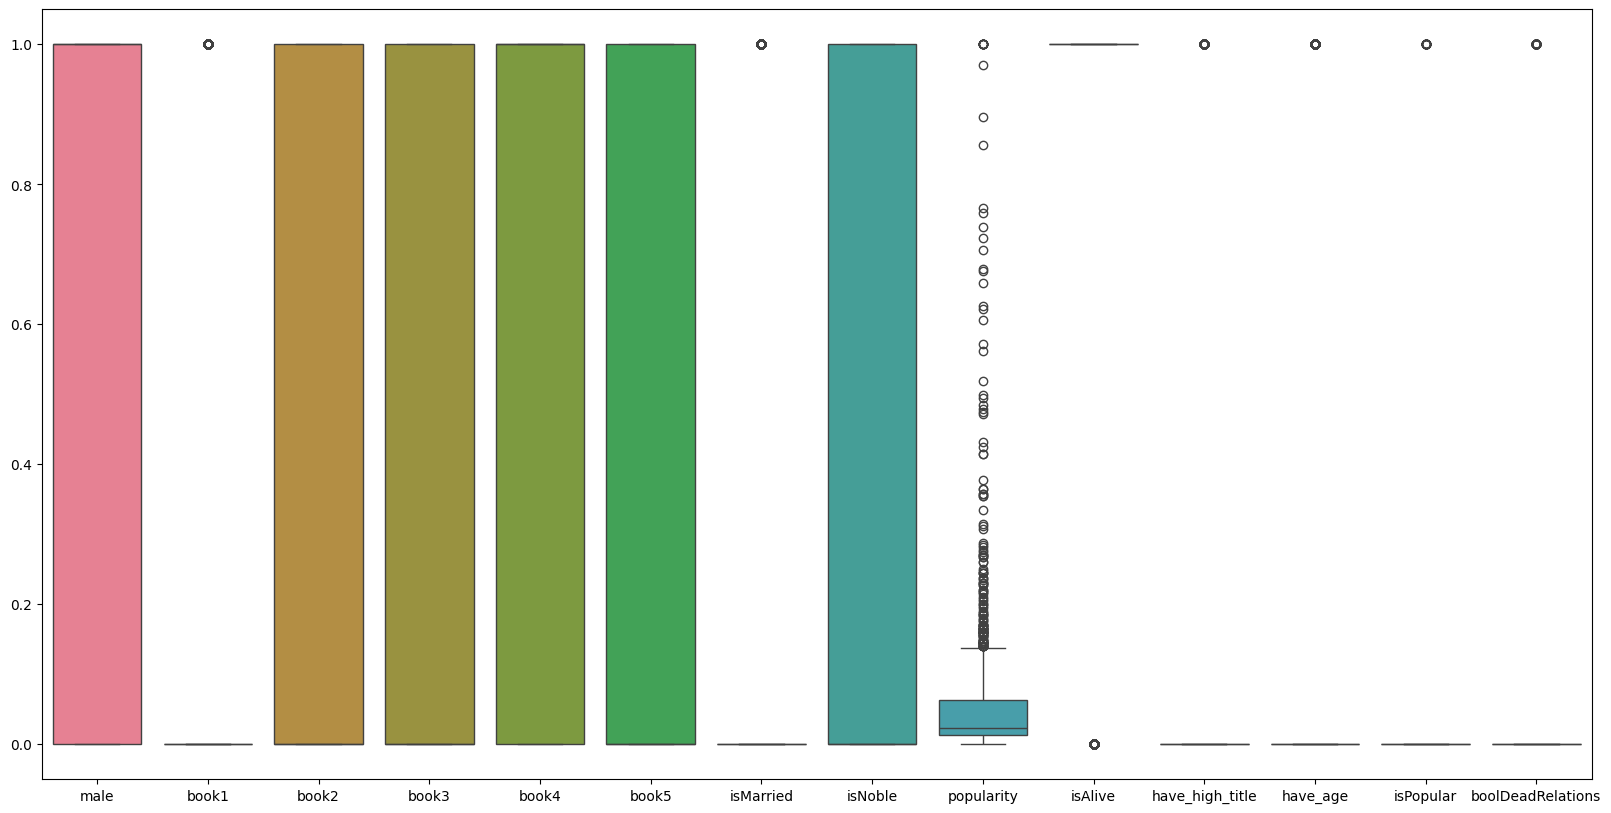

In [168]:
plt.figure(figsize=[20, 10])
sns.boxplot(data=data.select_dtypes(exclude=object).drop(columns=['age', 'numDeadRelations']))

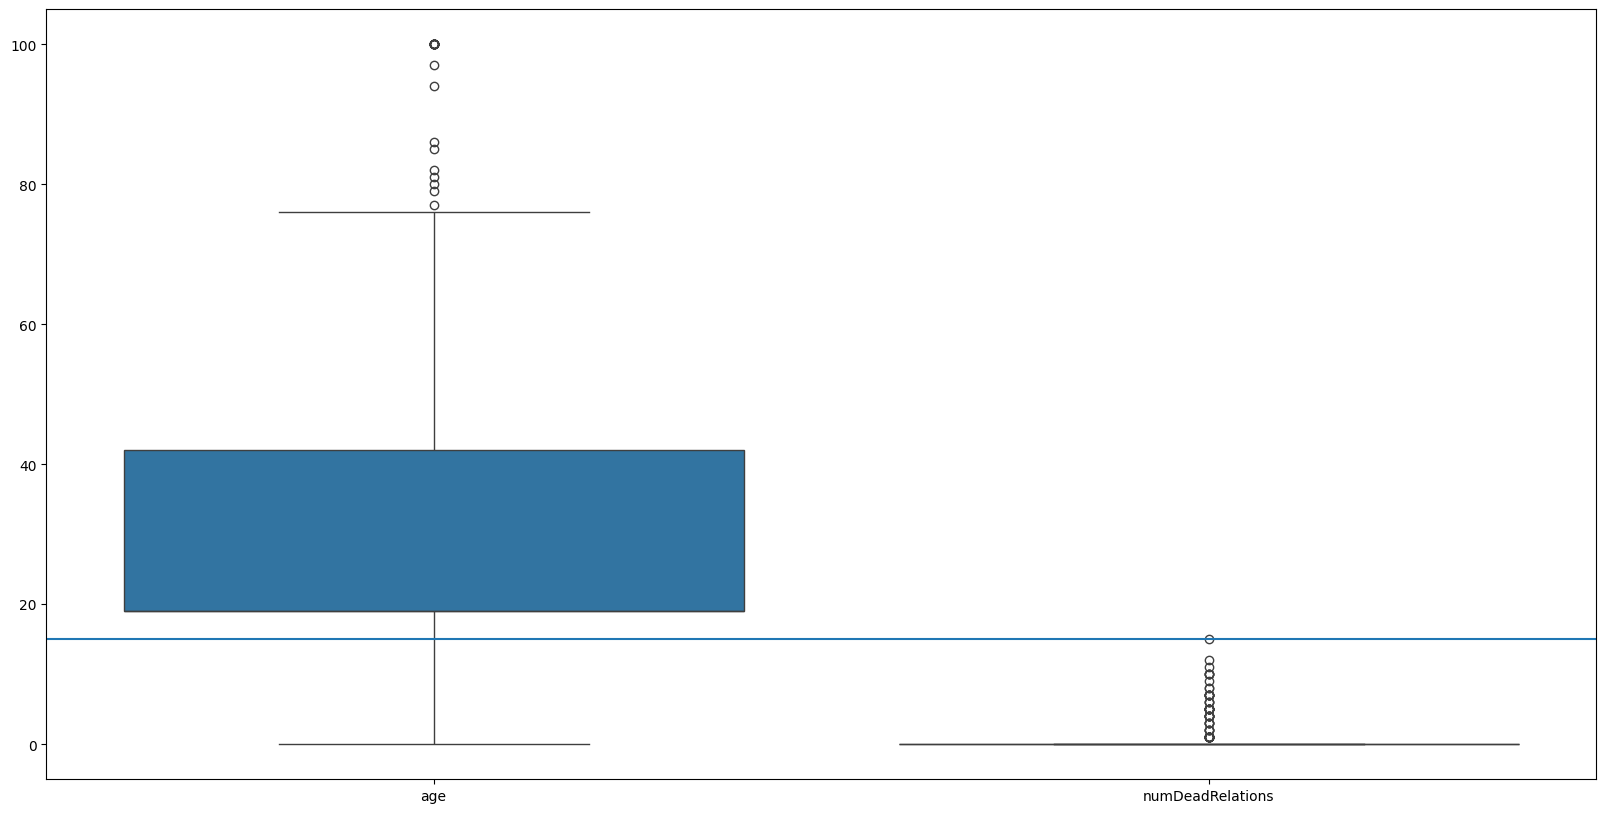

In [173]:
plt.figure(figsize=[20, 10])
sns.boxplot(data=data[['age', 'numDeadRelations']])
plt.axhline(15)

In [174]:
data[data.numDeadRelations == 15 ]

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,,,
283,Aegon IV Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,15,0.675585,0,0,0,1,1


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               1557 non-null   object 
 1   title              1557 non-null   object 
 2   male               1557 non-null   int64  
 3   culture            1557 non-null   object 
 4   house              1557 non-null   object 
 5   book1              1557 non-null   int64  
 6   book2              1557 non-null   int64  
 7   book3              1557 non-null   int64  
 8   book4              1557 non-null   int64  
 9   book5              1557 non-null   int64  
 10  isMarried          1557 non-null   int64  
 11  isNoble            1557 non-null   int64  
 12  age                1557 non-null   float64
 13  numDeadRelations   1557 non-null   int64  
 14  popularity         1557 non-null   float64
 15  isAlive            1557 non-null   int64  
 16  have_high_title    1557 non-n

In [178]:
data.select_dtypes(exclude=object).corr()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,numDeadRelations,popularity,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
male,1.000000,0.050526,0.024079,-0.008100,-0.101674,0.023022,-0.094385,0.133807,0.188752,0.027506,0.113342,-0.148290,0.061581,-0.019380,0.080518,0.039540
book1,0.050526,1.000000,0.278116,0.145458,-0.009461,0.180542,0.018072,0.041593,0.018188,0.082526,0.186818,-0.112468,-0.004844,0.061082,0.074789,0.139291
book2,0.024079,0.278116,1.000000,0.380968,0.102247,0.135720,0.153332,-0.033216,-0.036409,-0.004477,0.150816,-0.055998,0.005204,0.244288,0.001636,0.055850
book3,-0.008100,0.145458,0.380968,1.000000,0.329153,0.226547,0.165407,0.007279,-0.015970,-0.025633,0.140993,0.018427,0.061124,0.208347,-0.026356,0.032889
book4,-0.101674,-0.009461,0.102247,0.329153,1.000000,0.302338,0.141145,0.047394,-0.022788,-0.072370,0.038810,0.284014,-0.012856,0.146097,-0.061401,-0.024038
book5,0.023022,0.180542,0.135720,0.226547,0.302338,1.000000,0.065210,0.069338,0.025872,0.032609,0.089715,0.032531,0.066837,0.087696,0.000907,0.094381
isMarried,-0.094385,0.018072,0.153332,0.165407,0.141145,0.065210,1.000000,0.132037,0.150088,0.133491,0.241898,-0.049381,0.092373,0.202872,0.022525,0.197150
isNoble,0.133807,0.041593,-0.033216,0.007279,0.047394,0.069338,0.132037,1.000000,0.687081,0.024066,0.059233,-0.060572,0.316035,-0.002328,-0.038279,0.054631
age,0.188752,0.018188,-0.036409,-0.015970,-0.022788,0.025872,0.150088,0.687081,1.000000,0.049589,0.053805,-0.140453,0.201426,0.192802,-0.038981,0.054971
numDeadRelations,0.027506,0.082526,-0.004477,-0.025633,-0.072370,0.032609,0.133491,0.024066,0.049589,1.000000,0.613759,-0.198876,0.035120,0.147778,0.626712,0.781579


<Axes: >

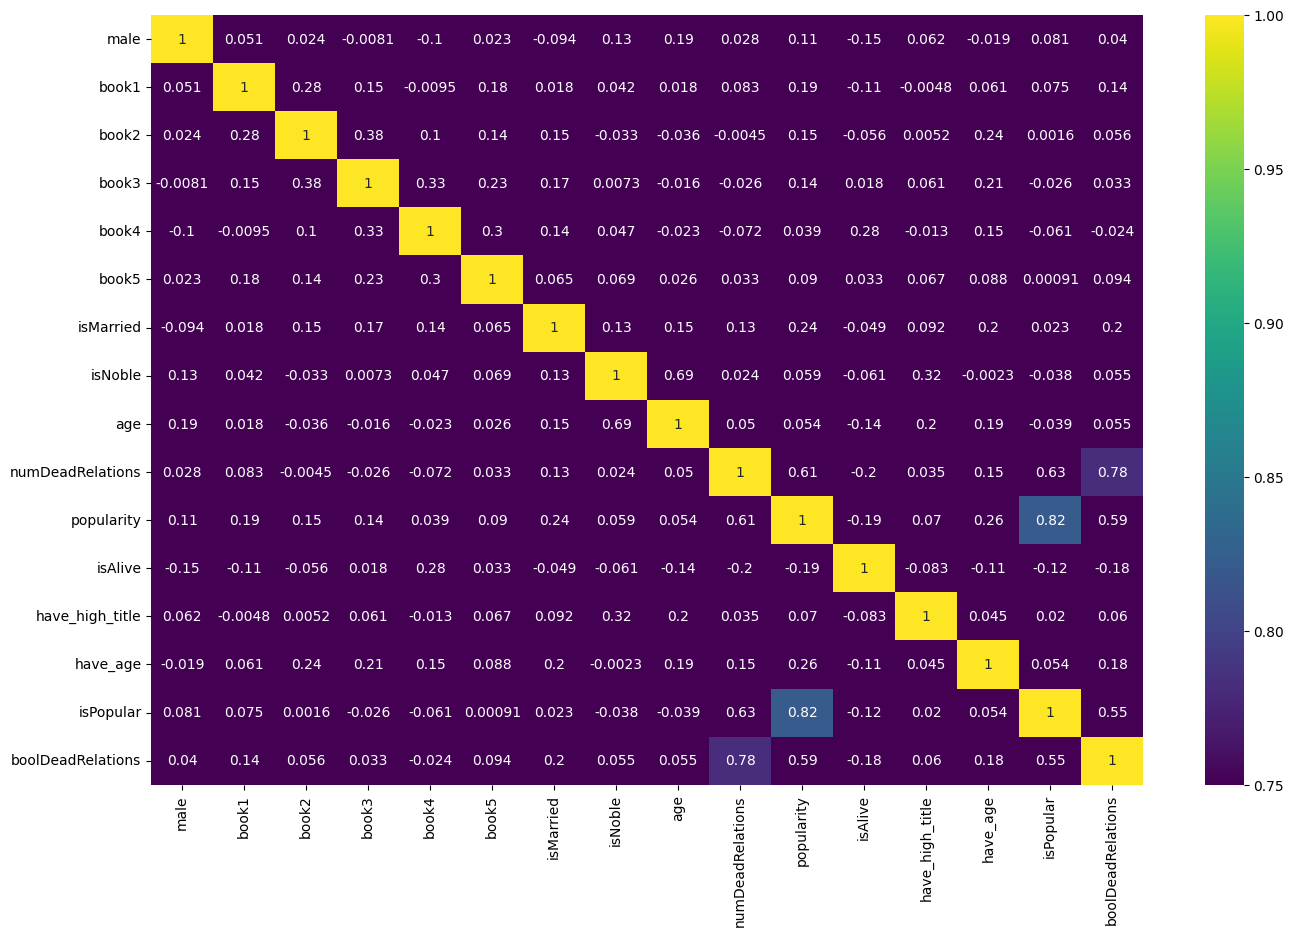

In [176]:
plt.figure(figsize=[16, 10])
sns.heatmap(data.select_dtypes(exclude=object).corr(), annot=True, cmap='viridis', vmin=.75)

<Axes: >

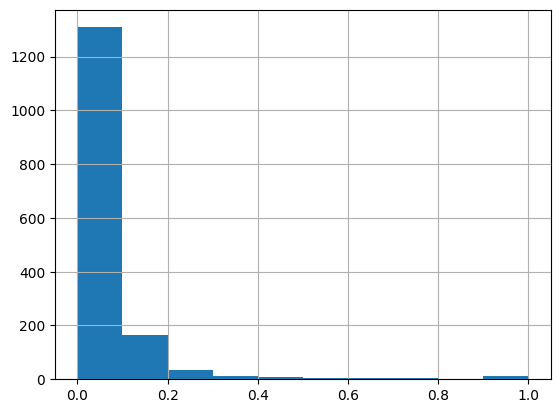

In [179]:
data.popularity.hist()

In [182]:
data.popularity.value_counts()

popularity
0.013378    126
0.016722    118
0.006689    113
0.010033    102
0.003344     87
           ... 
0.561873      1
0.250836      1
0.722408      1
0.478261      1
0.856187      1
Name: count, Length: 117, dtype: int64

In [202]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [193]:
data.popularity.values.reshape(-1, 1)

array([[0.60535117],
       [0.89632107],
       [0.26755853],
       ...,
       [0.07692308],
       [0.27090301],
       [0.04682274]], shape=(1557, 1))

In [194]:
scaled_popularity = scaler.fit_transform(data.popularity.values.reshape(-1, 1))

<Axes: ylabel='Count'>

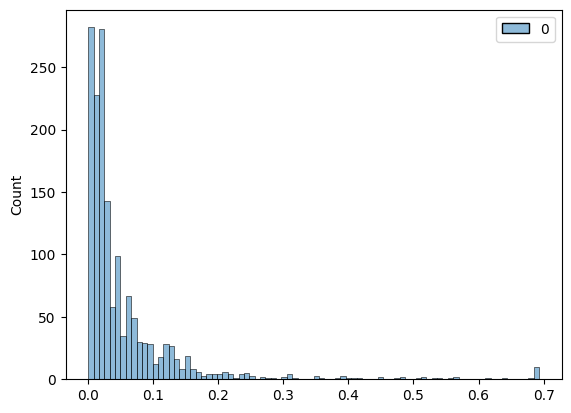

In [199]:
sns.histplot(np.log1p(data.popularity.values.reshape(-1, 1)))

<Axes: >

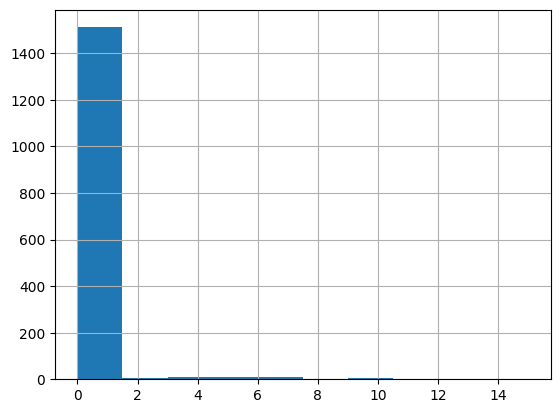

In [180]:
data.numDeadRelations.hist()

<Axes: ylabel='Count'>

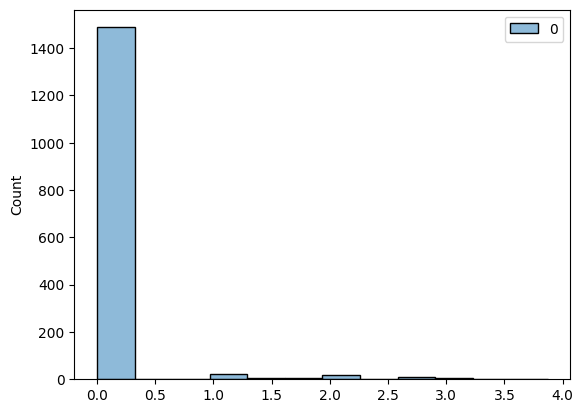

In [201]:
sns.histplot(np.sqrt(data.numDeadRelations.values.reshape(-1, 1)))

In [203]:
scaler = StandardScaler()

In [204]:
scaled_numDeadRelations = scaler.fit_transform(data.numDeadRelations.values.reshape(-1, 1))

C:\Users\swang\AppData\Local\Temp\ipykernel_3512\733119581.py:1: RuntimeWarning: invalid value encountered in sqrt
  sns.histplot(np.sqrt(scaled_numDeadRelations))


<Axes: ylabel='Count'>

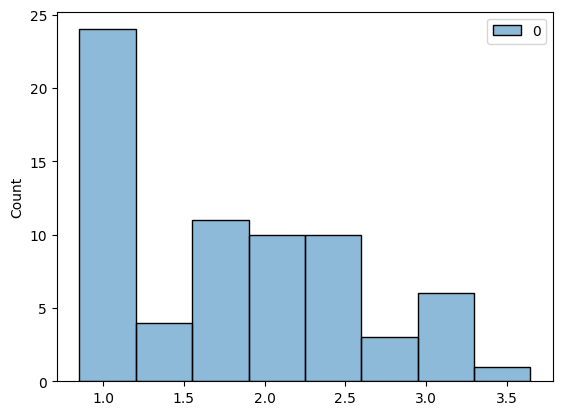

In [209]:
sns.histplot(np.sqrt(scaled_numDeadRelations))

In [184]:
data.numDeadRelations.value_counts()

numDeadRelations
0     1488
1       24
5       10
7        7
4        7
3        4
10       4
2        4
6        3
8        2
12       1
11       1
15       1
9        1
Name: count, dtype: int64

По итогу видим, что данные в `popularity` и `numDeadRelations` сильно скошены (логарифмирование и корень не помогают), поэтому было принято решение оставить бинарные признаки

In [212]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,0,0,0,1,1
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,1,0,0,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0,1,0,0
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,1,0,0,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0,0,0,0


<Axes: >

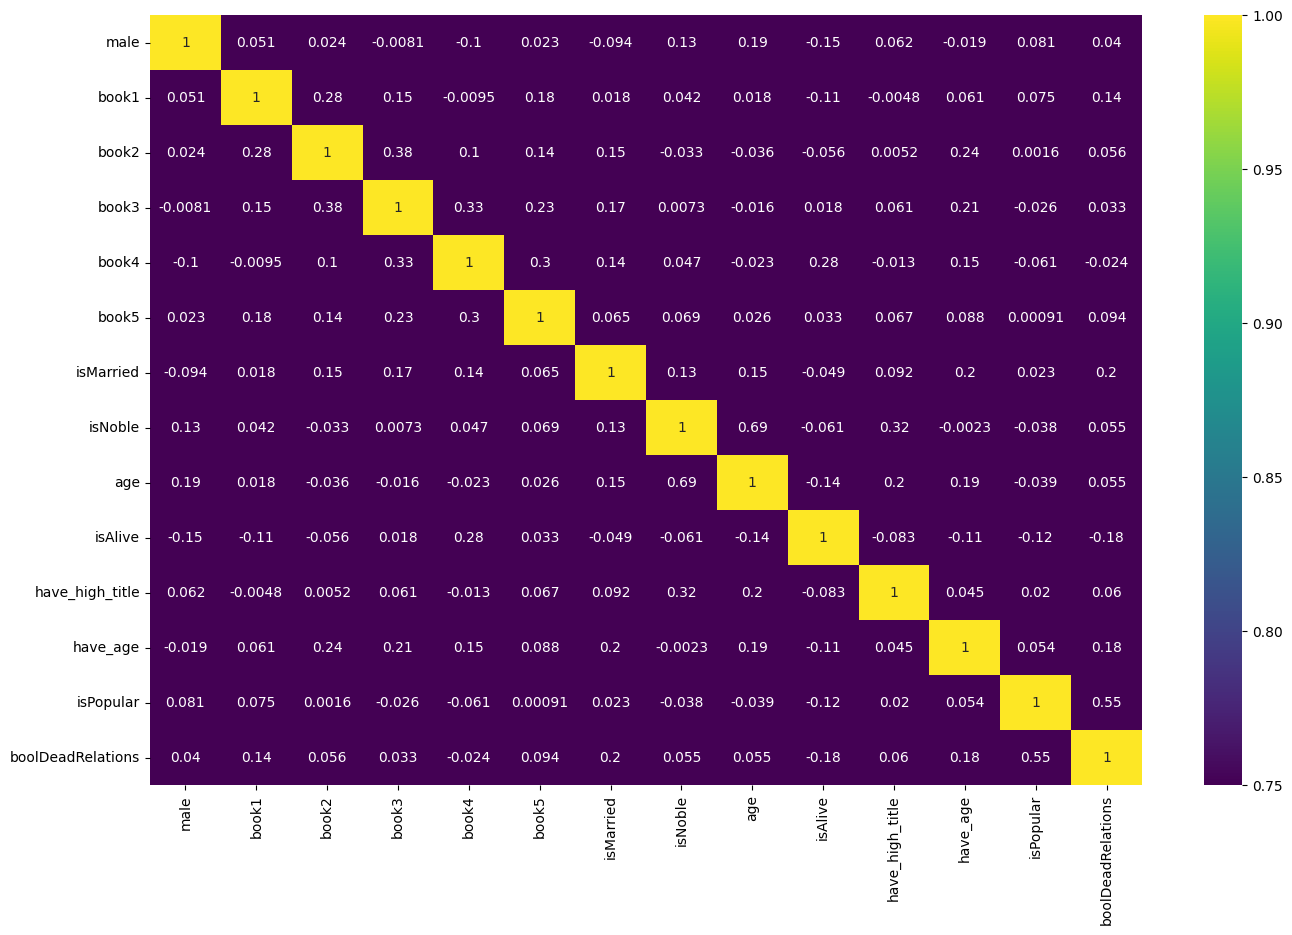

In [213]:
plt.figure(figsize=[16, 10])
sns.heatmap(data.select_dtypes(exclude=object).corr(), annot=True, cmap='viridis', vmin=.75)

In [214]:
data.to_csv('csv_for_ML/prepared_data_V1.csv')

**Задание 1.6.** Проанализируйте целевую переменную. Посмотрите, является ли она категориальной или количественной. Так как мы говорим о задаче классификации, проанализируйте является ли датасет сбалансированным по классам или нет.

In [51]:
data.isAlive.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

<Axes: xlabel='isAlive', ylabel='count'>

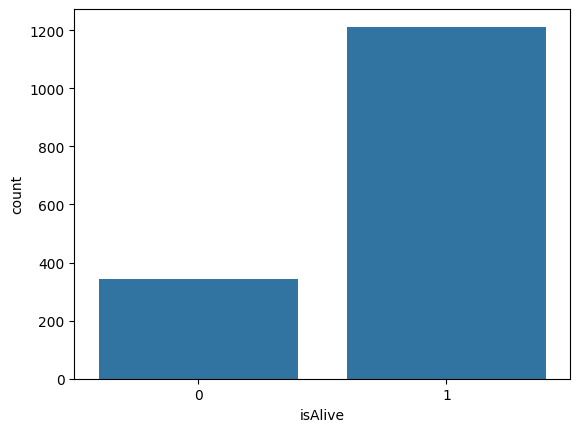

In [52]:
sns.countplot(data=data, x='isAlive')

**Задание 1.7.** Проанализируйте признаки.
  * Обработайте категориальные признаки и переведите их в числа. Можете выбрать любой кодировщик.
  * Проанализируйте количественные признаки. Есть ли корреляция между признаками?

In [215]:
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,0,0,0,1,1
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,1,0,0,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0,1,0,0
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,1,0,0,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0,0,0,0


## Остановился ТУТ, нужно уменьшить кол-во записей в признаках `house`, `culture`!! И дропнуть `name`

In [8]:
data = pd.read_csv('csv_for_ML/prepared_data_V1.csv', index_col='S.No')
data

,name,title,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,have_high_title,have_age,isPopular,boolDeadRelations
S.No,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,no_title,1,unknown,unknown,0,0,0,0,0,0,0,19.0,0,0,0,1,1
2,Walder Frey,Lord,1,Rivermen,House Frey,1,1,1,1,1,1,1,97.0,1,1,1,1,1
3,Addison Hill,no_title,1,unknown,House Swyft,0,0,0,1,0,0,1,42.0,1,0,0,0,0
4,Aemma Arryn,no_title,0,unknown,House Arryn,0,0,0,0,0,1,1,23.0,0,0,1,0,0
5,Sylva Santagar,no_title,0,Dornish,House Santagar,0,0,0,1,0,1,1,29.0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,no_title,1,unknown,unknown,1,0,1,1,0,0,1,42.0,1,0,0,0,0
1554,Masha Heddle,no_title,0,unknown,unknown,1,1,0,0,0,0,0,19.0,0,0,0,0,0
1555,Matthos Seaworth,no_title,1,unknown,House Seaworth,0,1,1,1,1,0,0,19.0,0,0,0,0,0


In [17]:
house_idxs = data.house.value_counts().head(9).index

In [23]:
culture_idxs = data.culture.value_counts().head(9).index

In [29]:
data.house = data.house.apply(lambda x: x if x in house_idxs else 'other')

In [30]:
data.culture = data.culture.apply(lambda x: x if x in culture_idxs else 'other').value_counts()

In [ ]:
pd.get_dummies(data.iloc[:, 1:], columns=['title', 'house', 'culture'], drop_first=True, dtype=int)

<class 'pandas.core.frame.DataFrame'>
Index: 1557 entries, 1 to 1557
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   male                   1557 non-null   int64  
 1   book1                  1557 non-null   int64  
 2   book2                  1557 non-null   int64  
 3   book3                  1557 non-null   int64  
 4   book4                  1557 non-null   int64  
 5   book5                  1557 non-null   int64  
 6   isMarried              1557 non-null   int64  
 7   isNoble                1557 non-null   int64  
 8   age                    1557 non-null   float64
 9   isAlive                1557 non-null   int64  
 10  have_high_title        1557 non-null   int64  
 11  have_age               1557 non-null   int64  
 12  isPopular              1557 non-null   int64  
 13  boolDeadRelations      1557 non-null   int64  
 14  title_Lady             1557 non-null   int64  
 15  title_Lor

<Axes: >

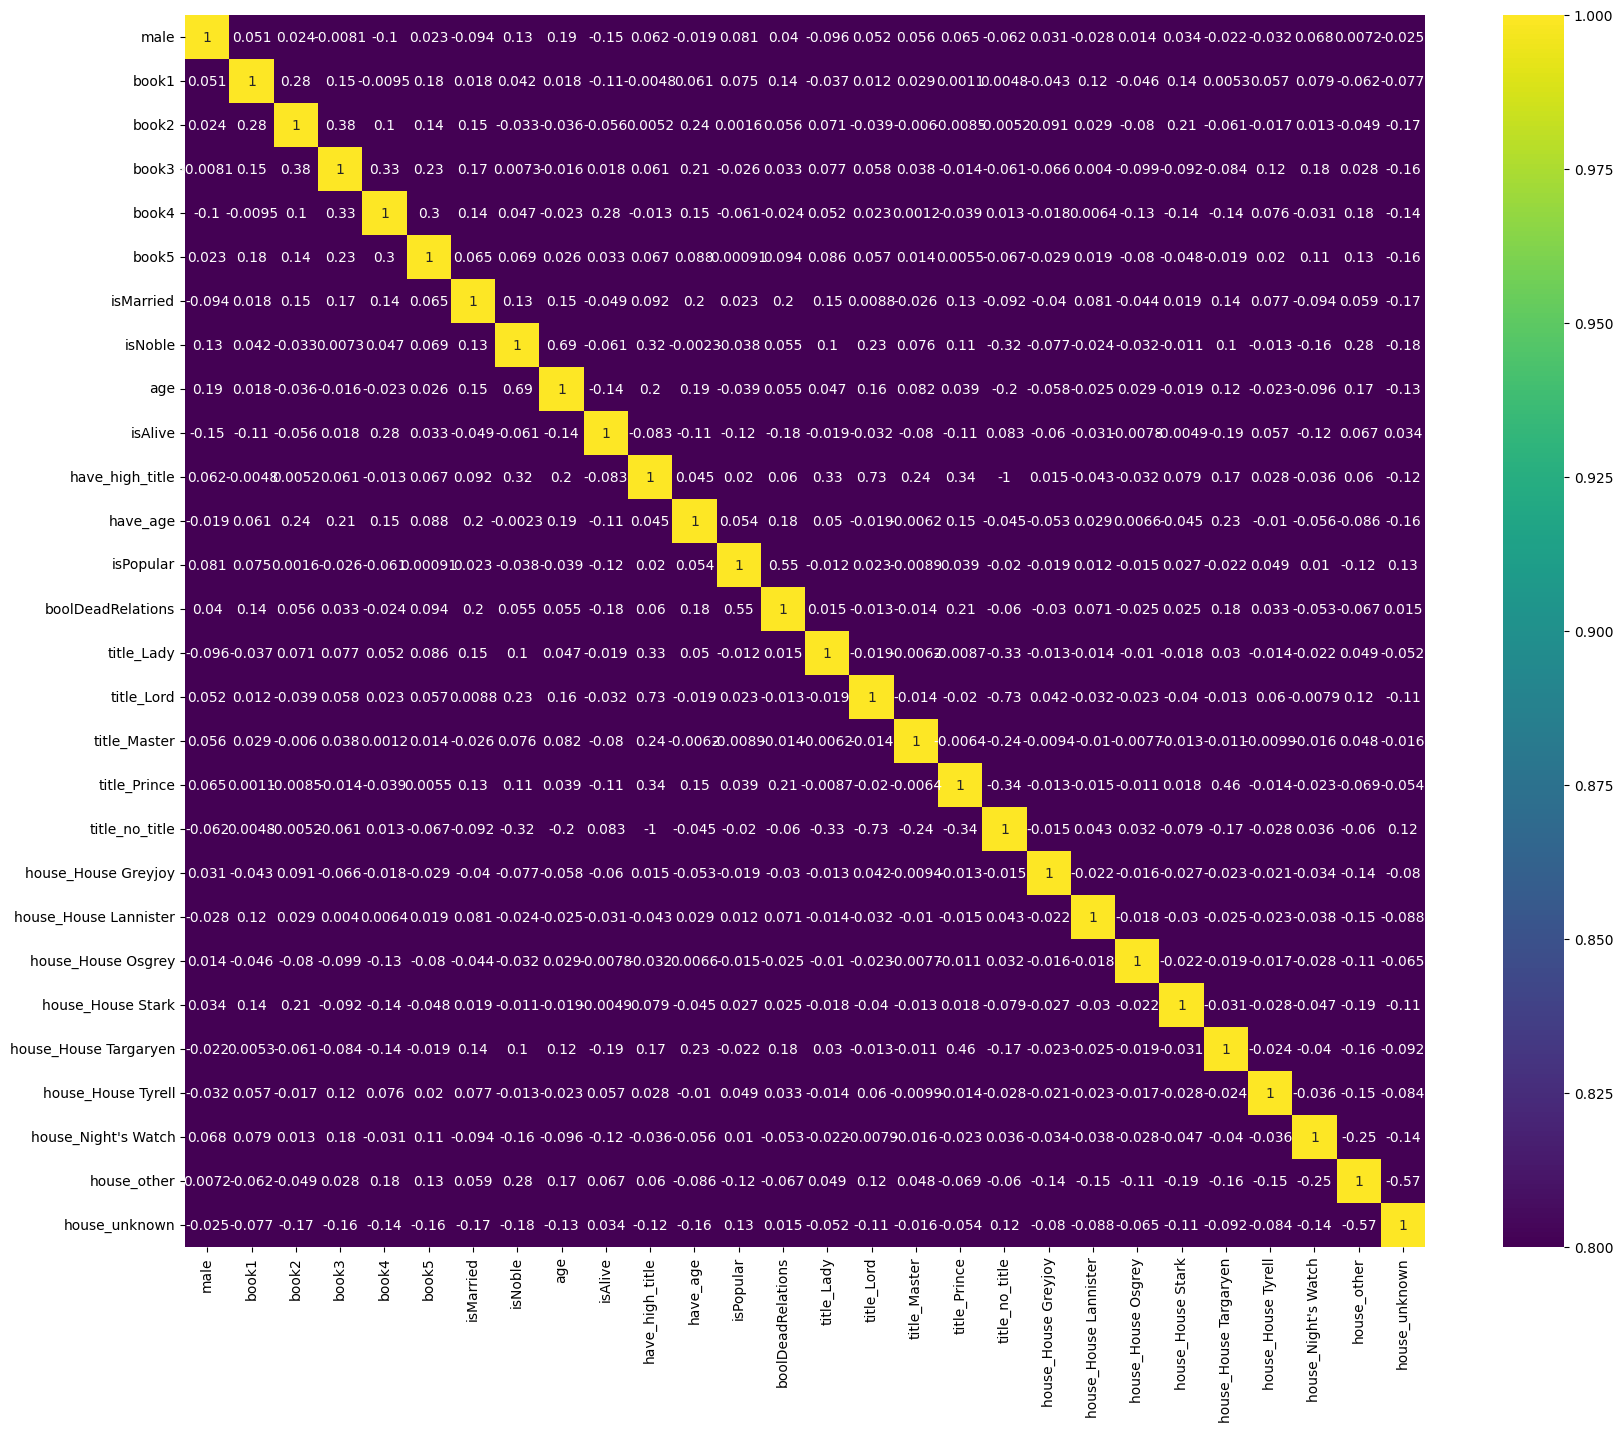

In [40]:
plt.figure(figsize=[20, 16])
sns.heatmap(pd.get_dummies(data.iloc[:, 1:], columns=['title', 'house', 'culture'], drop_first=True, dtype=int).corr(), annot=True, vmin=.8, cmap='viridis')

In [44]:
data = pd.get_dummies(data.iloc[:, 1:], columns=['title', 'house', 'culture'], drop_first=True, dtype=int)

In [45]:
data.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,...,title_no_title,house_House Greyjoy,house_House Lannister,house_House Osgrey,house_House Stark,house_House Targaryen,house_House Tyrell,house_Night's Watch,house_other,house_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,19.0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,97.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,42.0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,23.0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,1,1,29.0,1,...,1,0,0,0,0,0,0,0,1,0


In [48]:
data.to_csv('csv_for_ML/completed_data_for_ML_v1.csv', index='S.No')

**Задание 1.8.** Проанализируйте влияние признаков на целевую переменную.

In [65]:
np.array(data.corr()['isAlive'].sort_values().values).reshape(-1, 1)

array([[-0.18705715],
       [-0.17817686],
       [-0.14829038],
       [-0.14045277],
       [-0.12389959],
       [-0.11867319],
       [-0.11300468],
       [-0.11246821],
       [-0.10765378],
       [-0.08322157],
       [-0.07972574],
       [-0.0605722 ],
       [-0.06021608],
       [-0.05599775],
       [-0.04938068],
       [-0.03171124],
       [-0.03110767],
       [-0.01902572],
       [-0.00780603],
       [-0.00491263],
       [ 0.01842685],
       [ 0.03253064],
       [ 0.03389246],
       [ 0.05703582],
       [ 0.06717592],
       [ 0.08322157],
       [ 0.28401404],
       [ 1.        ]])

<Axes: >

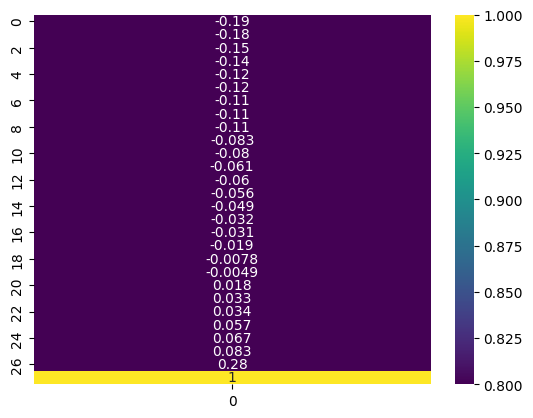

In [66]:
# plt.figure(figsize=[20, 16])
sns.heatmap(np.array(data.corr()['isAlive'].sort_values().values).reshape(-1, 1), annot=True, vmin=.8, cmap='viridis')

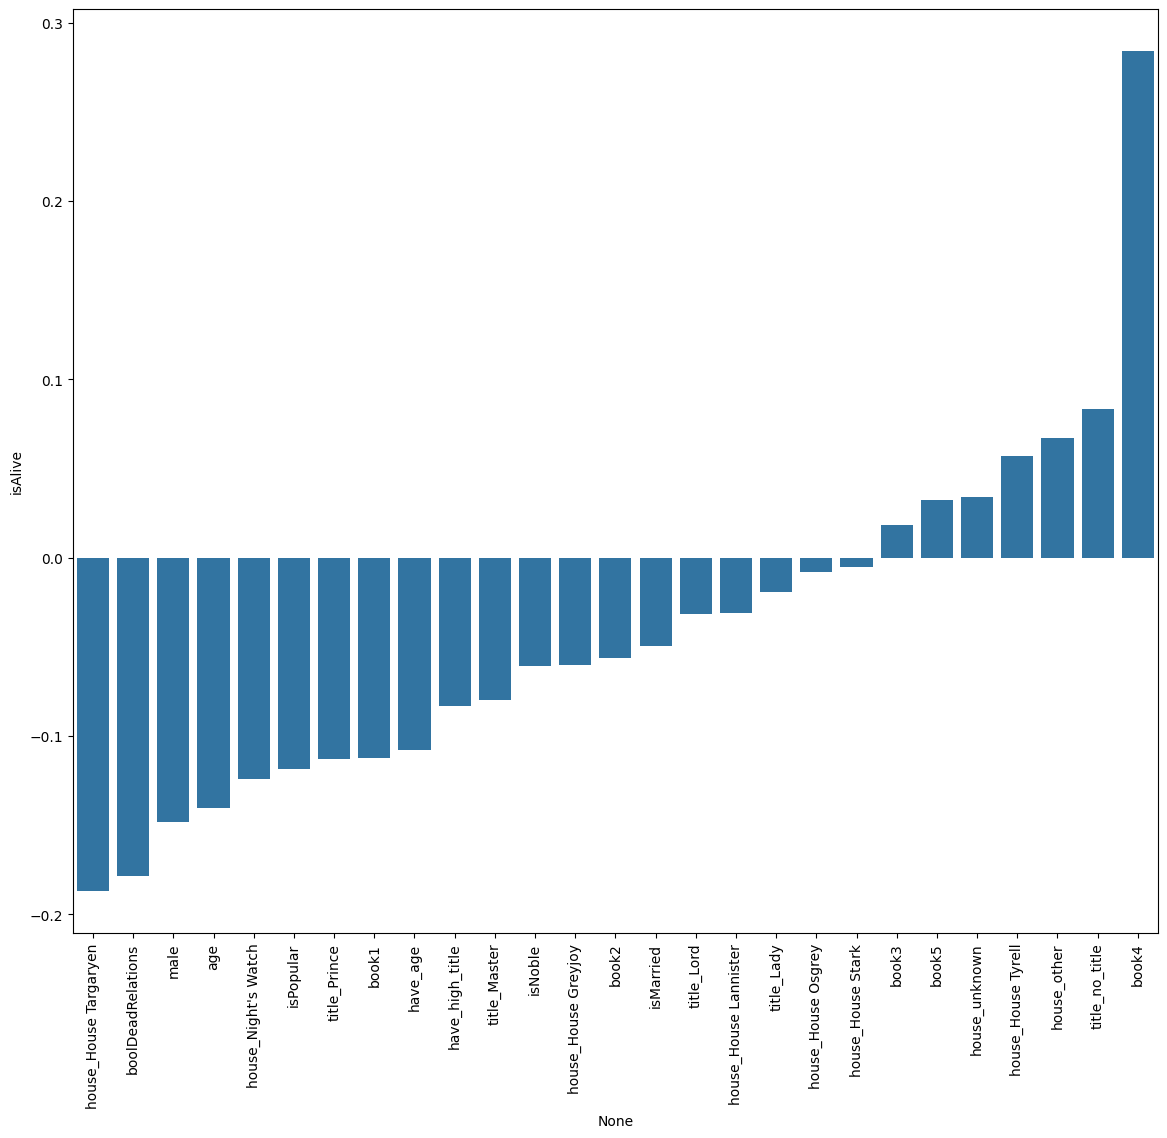

In [68]:
plt.figure(figsize=[14, 12])
sns.barplot(x=data.corr()['isAlive'].sort_values()[:-1].index, y=data.corr()['isAlive'].sort_values()[:-1])

plt.xticks(rotation=90);

**Задание 1.9.** Создайте переменные `X`, которая будет хранить только значения признаков, и `y`, которая будет хранить только значения целевой переменной.

In [69]:
X = data.drop(columns='isAlive')
y = data.isAlive

In [84]:
X.head()

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,have_high_title,...,title_no_title,house_House Greyjoy,house_House Lannister,house_House Osgrey,house_House Stark,house_House Targaryen,house_House Tyrell,house_Night's Watch,house_other,house_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,19.0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,97.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,42.0,0,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,23.0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,1,1,29.0,0,...,1,0,0,0,0,0,0,0,1,0


In [85]:
y.head()

S.No
1    0
2    1
3    1
4    0
5    1
Name: isAlive, dtype: int64

**Задание 1.10.** Разделите датасет на train и test часть при помощи функции `train_test_split`

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, test_size=.2, random_state=228)

In [72]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [73]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Часть 2. Обучение моделей

В данной части домашнего задания, мы хотим научиться обучать модели для задачи классификации на наших данных.

**Задание 2.1.** Импортируйте следующие модели из библиотеки `sklearn`
* LogisticRegression
* RandomForestClassifier
* AdaBoostClassifier
* GaussianProcessClassifier
* GaussianNB
* KNeighborsClassifier
* SVC
* DecisionTreeClassifier


In [74]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

В качестве примера, импортируем модель `LogisticRegression`

In [75]:
from sklearn.linear_model import LogisticRegression

Импортируйте остальные модели из библиотеки `sklearn`. Чтобы понять как это сделать, воспользуйтесь официальный документацией `sklearn` $→$ [тык](https://scikit-learn.org/dev/user_guide.html). По ключевому названию модели, вы сможете найти необходимую информацию о том, как можно импортировать модель из библиотеки.

In [ ]:
from ... import AdaBoostClassifier, RandomForestClassifier
from ... import GaussianProcessClassifier
from ... import GaussianNB
from ... import KNeighborsClassifier
from ... import SVC
from ... import DecisionTreeClassifier

**Задание 2.2.** Обучите модель и сделайте предсказание на тестовой выборке

В качестве примера, обучим модель `LogisticRegression` и сделаем на ней предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели
logistic_regression = LogisticRegression(C=1)

# Шаг 2. обучение модели
logistic_regression.fit(X_train, y_train)

# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

In [76]:
from sklearn.model_selection import GridSearchCV

### LogisticRegression

In [83]:
data

,male,book1,book2,book3,book4,book5,isMarried,isNoble,age,isAlive,...,title_no_title,house_House Greyjoy,house_House Lannister,house_House Osgrey,house_House Stark,house_House Targaryen,house_House Tyrell,house_Night's Watch,house_other,house_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,19.0,0,...,1,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,97.0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,42.0,1,...,1,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,23.0,0,...,1,0,0,0,0,0,0,0,1,0
5,0,0,0,0,1,0,1,1,29.0,1,...,1,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,42.0,1,...,1,0,0,0,0,0,0,0,0,1
1554,0,1,1,0,0,0,0,0,19.0,0,...,1,0,0,0,0,0,0,0,0,1
1555,1,0,1,1,1,1,0,0,19.0,0,...,1,0,0,0,0,0,0,0,1,0


In [77]:
y.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

In [78]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=100000)
param_grid = {
    'C': [.0001, .001, .01, .1, 1, 10, 20, 30]
}

In [79]:
grid_model_log = GridSearchCV(log_model, param_grid)

In [80]:
grid_model_log.fit(scaled_X_train, y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=100000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]})

In [82]:
grid_model_log.best_estimator_.coef_.round(4)

array([[-0.0091, -0.0088, -0.0043,  0.0026,  0.0211,  0.0025, -0.0015,
        -0.003 , -0.0083, -0.0048, -0.0059, -0.0084, -0.0129,  0.0001,
        -0.0017, -0.0061, -0.0073,  0.0048, -0.0047, -0.002 ,  0.0013,
         0.    , -0.0114,  0.0037, -0.0093,  0.0048,  0.0008]])

In [86]:
y_pred = grid_model_log.predict(scaled_X_test)

In [87]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [88]:
accuracy_score(y_test, y_pred)

0.7147435897435898

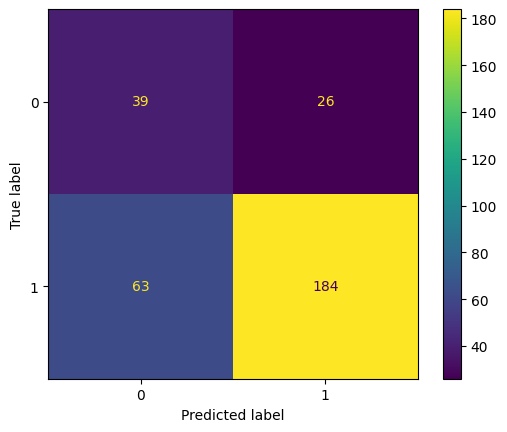

In [ ]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()

In [90]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.38      0.60      0.47        65
           1       0.88      0.74      0.81       247

    accuracy                           0.71       312
   macro avg       0.63      0.67      0.64       312
weighted avg       0.77      0.71      0.73       312



In [94]:
y.value_counts()

isAlive
1    1212
0     345
Name: count, dtype: int64

In [93]:
y.value_counts() * 100 / y.shape

isAlive
1    77.842004
0    22.157996
Name: count, dtype: float64

## Использование SMOTE для балансирования данных

In [95]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(scaled_X_train, y_train)


In [96]:
X_resampled

array([[ 0.82197281, -0.39086798, -0.7032765 , ..., -0.24407882,
        -1.01701216, -0.5646733 ],
       [ 0.82197281, -0.39086798, -0.7032765 , ..., -0.24407882,
        -1.01701216,  1.77093552],
       [-1.21658525, -0.39086798, -0.7032765 , ..., -0.24407882,
         0.98327242, -0.5646733 ],
       ...,
       [-0.51965899, -0.39086798, -0.7032765 , ..., -0.24407882,
        -1.01701216,  1.77093552],
       [ 0.07305121, -0.39086798,  1.42191584, ...,  4.09703726,
        -1.01701216, -0.5646733 ],
       [ 0.68340816, -0.39086798, -0.7032765 , ..., -0.24407882,
         0.98327242, -0.5646733 ]], shape=(1930, 27))

In [98]:
y_resampled.value_counts()

isAlive
1    965
0    965
Name: count, dtype: int64

In [102]:
log_model = LogisticRegression(penalty='l2', solver='lbfgs', max_iter=100000)
param_grid = {
    'C': [.0001, .001, .01, .1, 1, 10, 20, 30]
}

In [103]:
grid_model_log_smote = GridSearchCV(log_model, param_grid)

In [104]:
grid_model_log_smote.fit(X_resampled, y_resampled)

GridSearchCV(estimator=LogisticRegression(max_iter=100000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 20, 30]})

In [106]:
y_pred_smote = grid_model_log_smote.predict(scaled_X_test)

In [107]:
accuracy_score(y_test, y_pred_smote)

0.6858974358974359

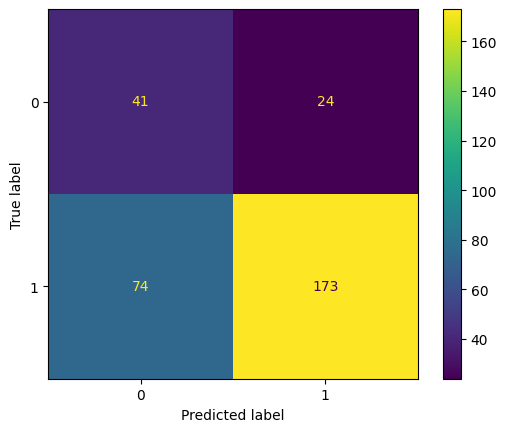

In [108]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_smote)).plot()

In [109]:
print(classification_report(y_test, y_pred_smote))

              precision    recall  f1-score   support

           0       0.36      0.63      0.46        65
           1       0.88      0.70      0.78       247

    accuracy                           0.69       312
   macro avg       0.62      0.67      0.62       312
weighted avg       0.77      0.69      0.71       312



In [110]:
from sklearn.metrics import roc_auc_score


In [111]:
y_proba = grid_model_log.predict_proba(scaled_X_test)[:, 1]  # вероятность для класса 1
y_pred_custom = (y_proba > 0.4).astype(int)  # вместо обычного 0.5

In [112]:
roc_auc_score(y_test, y_pred_custom)

np.float64(0.5)

### RandomForest, AdaBoost

In [113]:
rfc_model = RandomForestClassifier(class_weight='balanced')
abc_model = AdaBoostClassifier()

In [124]:
np.arange(100, 1000, 25)

array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
       425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725,
       750, 775, 800, 825, 850, 875, 900, 925, 950, 975])

In [114]:
param_grid_rfc = {
    'n_estimators': np.arange(100, 1000, 25),
    'max_depth': np.arange(5, 30, 5),
    'min_samples_split': [5, 7, 9, 10],
    'min_samples_leaf': [3, 4, 5],

}

param_grid_abc = {
    'estimator': [DecisionTreeClassifier(max_depth=2, class_weight='balanced'), DecisionTreeClassifier(max_depth=3, class_weight='balanced')],
    'n_estimators': np.arange(100, 1000, 25),
    'learning_rate': np.linspace(1, .01, 7),
}



In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rs_model_rfc = RandomizedSearchCV(rfc_model, param_grid_rfc)
rs_model_abc = RandomizedSearchCV(abc_model, param_grid_abc)

grid_model_rfc = GridSearchCV(rfc_model, param_grid_rfc)
grid_model_abc = GridSearchCV(abc_model, param_grid_abc)

In [119]:
# grid_model_rfc.fit(scaled_X_train, y_train)

In [120]:
rs_model_rfc.fit(scaled_X_train, y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(class_weight='balanced'),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25]),
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 7, 9, 10],
                                        'n_estimators': array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
       425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725,
       750, 775, 800, 825, 850, 875, 900, 925, 950, 975])})

In [121]:
rs_model_rfc.best_estimator_

RandomForestClassifier(class_weight='balanced', max_depth=np.int64(25),
                       min_samples_leaf=3, min_samples_split=7,
                       n_estimators=np.int64(375))

In [122]:
yrfc_pred = rs_model_rfc.predict(scaled_X_test)

In [123]:
accuracy_score(y_test, yrfc_pred)

0.6987179487179487

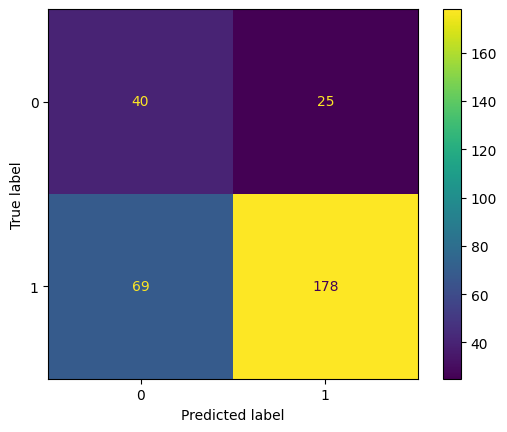

In [125]:
ConfusionMatrixDisplay(confusion_matrix(y_test, yrfc_pred)).plot()

In [126]:
print(classification_report(y_test, yrfc_pred))

              precision    recall  f1-score   support

           0       0.37      0.62      0.46        65
           1       0.88      0.72      0.79       247

    accuracy                           0.70       312
   macro avg       0.62      0.67      0.63       312
weighted avg       0.77      0.70      0.72       312



In [ ]:
#rs_model_abc.fit(X_train, y_train)

RandomizedSearchCV(estimator=AdaBoostClassifier(),
                   param_distributions={'estimator': [DecisionTreeClassifier(class_weight='balanced',
                                                                             max_depth=2),
                                                      DecisionTreeClassifier(class_weight='balanced',
                                                                             max_depth=3)],
                                        'learning_rate': array([1.   , 0.835, 0.67 , 0.505, 0.34 , 0.175, 0.01 ]),
                                        'n_estimators': array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
       425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725,
       750, 775, 800, 825, 850, 875, 900, 925, 950, 975])})

In [143]:
y_pred_rfc = rs_model_rfc.predict(X_test)
y_pred_abc = rs_model_abc.predict(X_test)

In [145]:
accuracy_score(y_test, y_pred_rfc), accuracy_score(y_test, y_pred_abc)

(0.7467948717948718, 0.7339743589743589)

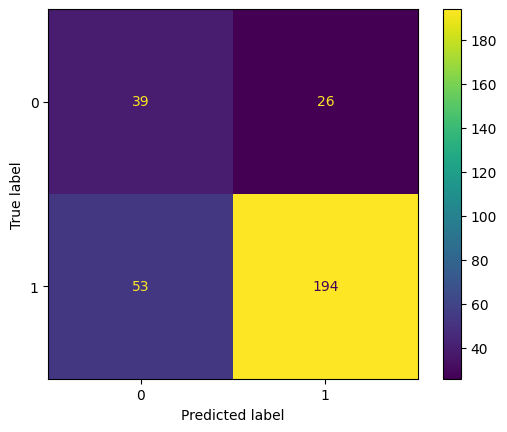

In [146]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rfc)).plot()

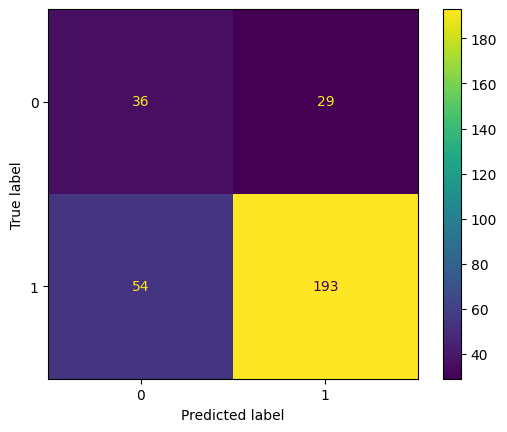

In [147]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_abc)).plot()

In [148]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.42      0.60      0.50        65
           1       0.88      0.79      0.83       247

    accuracy                           0.75       312
   macro avg       0.65      0.69      0.66       312
weighted avg       0.79      0.75      0.76       312



In [149]:
print(classification_report(y_test, y_pred_abc))

              precision    recall  f1-score   support

           0       0.40      0.55      0.46        65
           1       0.87      0.78      0.82       247

    accuracy                           0.73       312
   macro avg       0.63      0.67      0.64       312
weighted avg       0.77      0.73      0.75       312



In [154]:
from imblearn.ensemble import BalancedRandomForestClassifier
brfc_model = BalancedRandomForestClassifier()

In [155]:
brfc_rs_model = RandomizedSearchCV(brfc_model, param_grid_rfc)

In [156]:
brfc_rs_model.fit(X_train, y_train)

RandomizedSearchCV(estimator=BalancedRandomForestClassifier(),
                   param_distributions={'max_depth': array([ 5, 10, 15, 20, 25]),
                                        'min_samples_leaf': [3, 4, 5],
                                        'min_samples_split': [5, 7, 9, 10],
                                        'n_estimators': array([100, 125, 150, 175, 200, 225, 250, 275, 300, 325, 350, 375, 400,
       425, 450, 475, 500, 525, 550, 575, 600, 625, 650, 675, 700, 725,
       750, 775, 800, 825, 850, 875, 900, 925, 950, 975])})

In [157]:
y_pred_brfc = brfc_rs_model.predict(X_test)

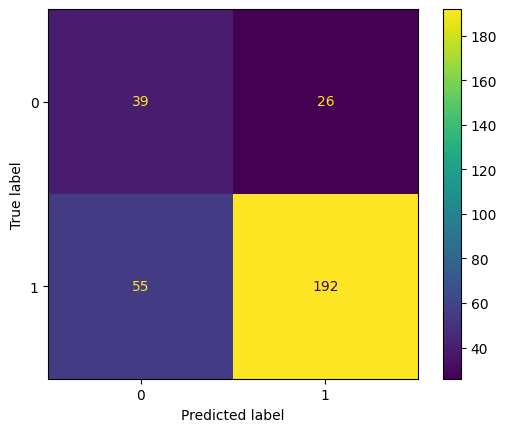

In [158]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_brfc)).plot()

In [159]:
print(classification_report(y_test, y_pred_brfc))

              precision    recall  f1-score   support

           0       0.41      0.60      0.49        65
           1       0.88      0.78      0.83       247

    accuracy                           0.74       312
   macro avg       0.65      0.69      0.66       312
weighted avg       0.78      0.74      0.76       312



# Доп. задание. Пробую изменить фичи

<b> Модели, которые нужно сделать: </b>

- AdaBoostClassifier, RandomForestClassifier
- GaussianProcessClassifier
- GaussianNB
- KNeighborsClassifier
- SVC
- DecisionTreeClassifier

In [57]:
data.isna().sum() * 100 / data.shape[0]

name                  0.000000
title                53.949904
male                  0.000000
culture               0.000000
dateOfBirth          82.080925
house                 0.000000
spouse               87.154785
book1                 0.000000
book2                 0.000000
book3                 0.000000
book4                 0.000000
book5                 0.000000
isAliveSpouse        87.154785
isMarried             0.000000
isNoble               0.000000
age                  82.080925
numDeadRelations      0.000000
popularity            0.000000
isAlive               0.000000
have_high_title       0.000000
new_age               0.000000
new_dob               0.000000
isPopular             0.000000
boolDeadRelations     0.000000
have_title            0.000000
dtype: float64

In [58]:
data

,name,title,male,culture,dateOfBirth,house,spouse,book1,book2,book3,...,age,numDeadRelations,popularity,isAlive,have_high_title,new_age,new_dob,isPopular,boolDeadRelations,have_title
S.No,,,,,,,,,,,,,,,,,,,,,
1,Viserys II Targaryen,NaN,1,unknown,NaN,unknown,NaN,0,0,0,...,NaN,11,0.605351,0,0,19.0,285.0,1,1,0
2,Walder Frey,Lord of the Crossing,1,Rivermen,208.0,House Frey,Perra Royce,1,1,1,...,97.0,1,0.896321,1,1,41.0,245.5,1,1,1
3,Addison Hill,Ser,1,unknown,NaN,House Swyft,NaN,0,0,0,...,NaN,0,0.267559,1,0,41.0,245.5,0,0,1
4,Aemma Arryn,Queen,0,unknown,82.0,House Arryn,Viserys I Targaryen,0,0,0,...,23.0,0,0.183946,0,0,41.0,245.5,0,0,1
5,Sylva Santagar,Greenstone,0,Dornish,276.0,House Santagar,Eldon Estermont,0,0,0,...,29.0,0,0.043478,1,0,41.0,245.5,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,Marwyn,Archmaester,1,unknown,NaN,unknown,NaN,1,0,1,...,NaN,0,0.160535,1,0,41.0,245.5,0,0,1
1554,Masha Heddle,NaN,0,unknown,NaN,unknown,NaN,1,1,0,...,NaN,0,0.040134,0,0,19.0,285.0,0,0,0
1555,Matthos Seaworth,NaN,1,unknown,NaN,House Seaworth,NaN,0,1,1,...,NaN,0,0.076923,0,0,19.0,285.0,0,0,0


In [59]:
data_ml2 = data.drop(columns=['name', 'title', 'dateOfBirth', 'spouse', 'isAliveSpouse', 'age', 'new_age', 'new_dob'])
data_ml2

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,have_high_title,isPopular,boolDeadRelations,have_title
S.No,,,,,,,,,,,,,,,,,
1,1,unknown,unknown,0,0,0,0,0,0,0,11,0.605351,0,0,1,1,0
2,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,1,1,1,1,1
3,1,unknown,House Swyft,0,0,0,1,0,0,1,0,0.267559,1,0,0,0,1
4,0,unknown,House Arryn,0,0,0,0,0,1,1,0,0.183946,0,0,0,0,1
5,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,unknown,unknown,1,0,1,1,0,0,1,0,0.160535,1,0,0,0,1
1554,0,unknown,unknown,1,1,0,0,0,0,0,0,0.040134,0,0,0,0,0
1555,1,unknown,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0,0,0,0,0


In [60]:
pd.get_dummies(data_ml2, columns=['culture', 'house'], drop_first=True)

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,house_Sea watch,house_Second Sons,house_Stone Crows,house_Stormcrows,house_Summer Islands,house_The Citadel,house_Windblown,house_Wise Masters,house_unknown,house_wildling
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,11,0.605351,...,False,False,False,False,False,False,False,False,True,False
2,1,1,1,1,1,1,1,1,1,0.896321,...,False,False,False,False,False,False,False,False,False,False
3,1,0,0,0,1,0,0,1,0,0.267559,...,False,False,False,False,False,False,False,False,False,False
4,0,0,0,0,0,0,1,1,0,0.183946,...,False,False,False,False,False,False,False,False,False,False
5,0,0,0,0,1,0,1,1,0,0.043478,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,0,0.160535,...,False,False,False,False,False,False,False,False,True,False
1554,0,1,1,0,0,0,0,0,0,0.040134,...,False,False,False,False,False,False,False,False,True,False
1555,1,0,1,1,1,1,0,0,0,0.076923,...,False,False,False,False,False,False,False,False,False,False


#### Преобразование данных для деревьев (RandomForest, DecisionTree, AdaBoost)
Деревья на самом деле не чувствительны к «порядку» меток: они ищут не расстояния между числами, а пороговые сплайты. Поэтому для этих моделей `LabelEncoder` вполне годится.

In [61]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [62]:
data_ml2_for_trees = data_ml2.copy()

In [63]:
data_ml2_for_trees.culture = le.fit_transform(data_ml2.culture)
data_ml2_for_trees.house = le.fit_transform(data_ml2.house)

In [64]:
data_ml2_for_trees

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,have_high_title,isPopular,boolDeadRelations,have_title
S.No,,,,,,,,,,,,,,,,,
1,1,50,314,0,0,0,0,0,0,0,11,0.605351,0,0,1,1,0
2,1,31,106,1,1,1,1,1,1,1,1,0.896321,1,1,1,1,1
3,1,50,244,0,0,0,1,0,0,1,0,0.267559,1,0,0,0,1
4,0,50,21,0,0,0,0,0,1,1,0,0.183946,0,0,0,0,1
5,0,7,219,0,0,0,1,0,1,1,0,0.043478,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,50,314,1,0,1,1,0,0,1,0,0.160535,1,0,0,0,1
1554,0,50,314,1,1,0,0,0,0,0,0,0.040134,0,0,0,0,0
1555,1,50,222,0,1,1,1,1,0,0,0,0.076923,0,0,0,0,0


#### Преобразование данных на основе расстояний или ядер (KNN, SVC, GaussianProcess)
Здесь нужно использовать get_dummies, но так как по итогу получается слишком много признаков, то необходимо сократить данные в признаке, то есть оставить основные, а те которых меньше всего сгруппировать в группу `other`

In [65]:
data_ml2_for_based_on_kernel = data_ml2.copy()

In [66]:
data_ml2_for_based_on_kernel

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,have_high_title,isPopular,boolDeadRelations,have_title
S.No,,,,,,,,,,,,,,,,,
1,1,unknown,unknown,0,0,0,0,0,0,0,11,0.605351,0,0,1,1,0
2,1,Rivermen,House Frey,1,1,1,1,1,1,1,1,0.896321,1,1,1,1,1
3,1,unknown,House Swyft,0,0,0,1,0,0,1,0,0.267559,1,0,0,0,1
4,0,unknown,House Arryn,0,0,0,0,0,1,1,0,0.183946,0,0,0,0,1
5,0,Dornish,House Santagar,0,0,0,1,0,1,1,0,0.043478,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,unknown,unknown,1,0,1,1,0,0,1,0,0.160535,1,0,0,0,1
1554,0,unknown,unknown,1,1,0,0,0,0,0,0,0.040134,0,0,0,0,0
1555,1,unknown,House Seaworth,0,1,1,1,1,0,0,0,0.076923,0,0,0,0,0


In [67]:
cult_list = data_ml2.culture.value_counts().iloc[:12].index.to_list()
cult_list

['unknown',
 'Northmen',
 'Ironborn',
 'Free Folk',
 'Braavosi',
 'Valyrian',
 'Ghiscari',
 'Dornish',
 'Dothraki',
 'Reach',
 'Vale mountain clans',
 'Rivermen']

In [68]:
house_list = data_ml2.house.value_counts().iloc[:15].index.to_list()
house_list

['unknown',
 'House Frey',
 "Night's Watch",
 'House Stark',
 'House Targaryen',
 'House Lannister',
 'House Tyrell',
 'House Greyjoy',
 'House Osgrey',
 'Faith of the Seven',
 'House Botley',
 'House Hightower',
 'House Martell',
 'House Arryn',
 'House Florent']

**После просмотра данных было решено оставить по `12` категорий для `culture` и `15` категорий для `house`**

In [69]:
data_ml2_for_based_on_kernel.culture = data_ml2_for_based_on_kernel.culture.apply(lambda x: x if x in cult_list else 'other')

In [70]:
data_ml2_for_based_on_kernel.house = data_ml2_for_based_on_kernel.house.apply(lambda x: x if x in house_list else 'other')

In [71]:
data_ml2_for_based_on_kernel = pd.get_dummies(data_ml2_for_based_on_kernel, columns=['culture', 'house'], drop_first=True, dtype=int)

In [72]:
data_ml2_for_based_on_kernel

,male,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,...,house_House Hightower,house_House Lannister,house_House Martell,house_House Osgrey,house_House Stark,house_House Targaryen,house_House Tyrell,house_Night's Watch,house_other,house_unknown
S.No,,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,11,0.605351,...,0,0,0,0,0,0,0,0,0,1
2,1,1,1,1,1,1,1,1,1,0.896321,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,1,0,0,1,0,0.267559,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,1,1,0,0.183946,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,1,0,1,1,0,0.043478,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,1,0,1,1,0,0,1,0,0.160535,...,0,0,0,0,0,0,0,0,0,1
1554,0,1,1,0,0,0,0,0,0,0.040134,...,0,0,0,0,0,0,0,0,0,1
1555,1,0,1,1,1,1,0,0,0,0.076923,...,0,0,0,0,0,0,0,0,1,0


## Preparing new data

In [73]:
data_ml2_for_trees

,male,culture,house,book1,book2,book3,book4,book5,isMarried,isNoble,numDeadRelations,popularity,isAlive,have_high_title,isPopular,boolDeadRelations,have_title
S.No,,,,,,,,,,,,,,,,,
1,1,50,314,0,0,0,0,0,0,0,11,0.605351,0,0,1,1,0
2,1,31,106,1,1,1,1,1,1,1,1,0.896321,1,1,1,1,1
3,1,50,244,0,0,0,1,0,0,1,0,0.267559,1,0,0,0,1
4,0,50,21,0,0,0,0,0,1,1,0,0.183946,0,0,0,0,1
5,0,7,219,0,0,0,1,0,1,1,0,0.043478,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1553,1,50,314,1,0,1,1,0,0,1,0,0.160535,1,0,0,0,1
1554,0,50,314,1,1,0,0,0,0,0,0,0.040134,0,0,0,0,0
1555,1,50,222,0,1,1,1,1,0,0,0,0.076923,0,0,0,0,0


In [74]:
X_tr = data_ml2_for_trees.drop(columns='isAlive')
y_tr = data_ml2_for_trees.isAlive

In [75]:
X_ker = data_ml2_for_based_on_kernel.drop(columns='isAlive')
y_ker = data_ml2_for_based_on_kernel.isAlive

In [77]:
from sklearn.model_selection import train_test_split

In [78]:
X_tr_train, X_tr_test, y_tr_train, y_tr_test = train_test_split(X_tr, y_tr, shuffle=True, random_state=1337, test_size=.2)

In [79]:
X_ker_train, X_ker_test, y_ker_train, y_ker_test = train_test_split(X_ker, y_ker, shuffle=True, random_state=1337, test_size=.2)

In [81]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [82]:
scaled_X_ker_train = scaler.fit_transform(X_ker_train)
scaled_X_ker_test = scaler.transform(X_ker_test)

## LogisticRegression apllying a new data!

In [102]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(penalty='l2', solver='lbfgs', class_weight='balanced', max_iter=100000)
param_grid = {
    'C': [.0001, .001, .01, .1, 1, 10, 100]
}

In [103]:
from sklearn.model_selection import GridSearchCV
grid_model_log = GridSearchCV(log_model, param_grid)

In [106]:
grid_model_log.fit(scaled_X_ker_train, y_ker_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=100000),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]})

In [107]:
grid_model_log.best_estimator_

LogisticRegression(C=0.0001, class_weight='balanced', max_iter=100000)

In [108]:
y_pred_log = grid_model_log.predict(scaled_X_ker_test)

In [90]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, confusion_matrix, classification_report

In [109]:
accuracy_score(y_ker_test, y_pred_log)

0.7532051282051282

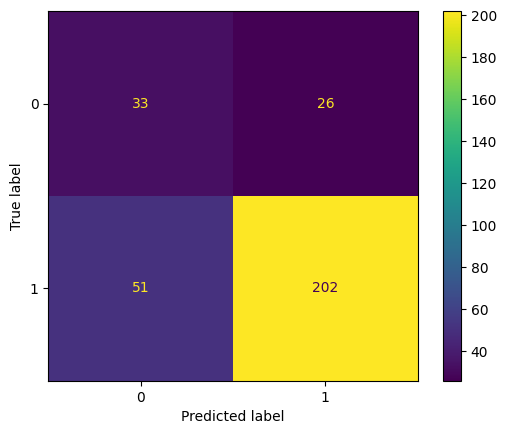

In [110]:
ConfusionMatrixDisplay(confusion_matrix(y_ker_test, y_pred_log)).plot()

In [111]:
print(classification_report(y_ker_test, y_pred_log))

              precision    recall  f1-score   support

           0       0.39      0.56      0.46        59
           1       0.89      0.80      0.84       253

    accuracy                           0.75       312
   macro avg       0.64      0.68      0.65       312
weighted avg       0.79      0.75      0.77       312



## 

Аналогичным образом обучите остальные модели и сделайте предсказания на тестовой выборке.

In [ ]:
# Шаг 1. создание модели


# Шаг 2. обучение модели


# Шаг 3. Предсказание на тестовых данных


## Часть 3. Оцените качество моделей

Вам необходимо познакомиться с метриками задачи классификации из sklearn. Оцените все модели и выберите лучшую по метрике качества Accuracy.

С метриками классификации вы можете ознакомиться в [Yandex ML Book](https://education.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii).

Для простоты в данном домашнем задании мы будем работать с самой базовой метрикой для задачи классификации - accuracy.

**Задание 3.1.** Вам необходимо посчитать метрику для всех моделей и выбрать лучшую модель.

Сначала импортируем необходимую функцию из библиотеки sklearn для подсчета accuracy.

In [ ]:
from sklearn.metrics import accuracy_score

В качестве примера, посчитаем метрику accuracy для модели `LogisticRegression`

In [ ]:
# Шаг 3. Предсказание на тестовых данных
y_pred = logistic_regression.predict(X_test)

# Шаг 4. Оценка предсказания по метрике accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy : %.4f" % accuracy)

Аналогичным образом посчитайте метрику accuracy для остальных моделей

In [ ]:
# Шаг 3. Предсказание на тестовых данных


# Шаг 4. Оценка предсказания по метрике accuracy

print("Accuracy : %.4f" % accuracy)

Выберите лучшую модель.

### Файл `submission.csv`

Вам нужно вместо значений в `submission.csv` файле в колонке `isAlive`, подставить свои предсказания и сохранить измененный файл.

In [ ]:
!gdown 1M14conWjAW2QLoyCXbHEAy8bql2f99eF

Downloading...
From: https://drive.google.com/uc?id=1M14conWjAW2QLoyCXbHEAy8bql2f99eF
To: /content/submission.csv
100% 2.74k/2.74k [00:00<00:00, 9.42MB/s]


In [ ]:
submission = pd.read_csv("/content/submission.csv", index_col='S.No')

In [ ]:
submission

,isAlive
S.No,
1558,0
1559,0
1560,0
1561,0
1562,0
...,...
1942,0
1943,0
1944,0


Как сохранить измененный Pandas DataFrame в csv файл:

In [ ]:
submission.to_csv("/content/new_submission.csv", index=False)